# Credit Card Customer Segmentation using K-means clustering


Customer segmentation is a powerful technique for dividing a customer base into distinct groups. By implementing a client segmentation model, businesses can effectively categorize consumers, gaining valuable insights into their behaviors and preferences. This understanding enables card issuers to optimize card usage and attract new customers through innovative approaches.

Through segmentation, card issuers can not only tailor higher-value propositions but also identify underserved groups within their customer base. By leveraging enhanced segmentation techniques, such as analyzing behavioral patterns, businesses can devise better strategies and alternatives to meet the diverse demands of these customer segments. This proactive approach fosters customer satisfaction and loyalty, driving long-term success in the competitive market landscape.

### Data dictionary is as follows:
* ***BALANCE*** : Balance amount left in customers account to make purchases
* ***BALANCE_FREQUENCY*** : How frequently the Balance is updated, score between 0 and 1
* ***PURCHASES*** : Amount of purchases made from account
* ***PURCHASES_FREQUENCY*** : How frequently the Purchases are being made, score between 0 and 1
* ***ONEOFF_PURCHASES*** : Maximum purchase amount done in one-go
* ***ONEOFFPURCHASESFREQUENCY*** : How frequently Purchases are happening in one-go
* ***INSTALLMENTS_PURCHASES*** : Amount of purchase done in installment
* ***CASH_ADVANCE*** : Cash in advance given by the user
* ***PURCHASESINSTALLMENTSFREQUENCY*** : How frequently purchases in installments are being done
* ***CASHADVANCEFREQUENCY*** : How frequently the cash in advance being paid
* ***CASHADVANCETRX*** : Number of Transactions made with "Cash in Advance"
* ***PURCHASES_TRX*** : Number of purchase transactions made
* ***CREDIT_LIMIT*** : Limit of Credit Card for user
* ***PAYMENTS*** : Amount of Payment done by user
* ***MINIMUM_PAYMENTS*** : Minimum amount of payments made by user
* ***PRCFULLPAYMENT*** : Percent of full payment paid by user
* ***TENURE*** : Tenure of credit card service for user

# 1. LOAD DATA

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/customer-credit-card-info/Clustered_Customer_Data.csv", index_col=0)

In [3]:
print('Number of datapoints:', len(df))
df.head()

Number of datapoints: 8950


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [4]:
data = df.drop('Cluster',axis=1)
y = df['Cluster']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT_LIMI

# 2. DATA ANALYSIS

In [6]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
data.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         206
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [8]:
# checking null values
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
data.duplicated().sum()

0

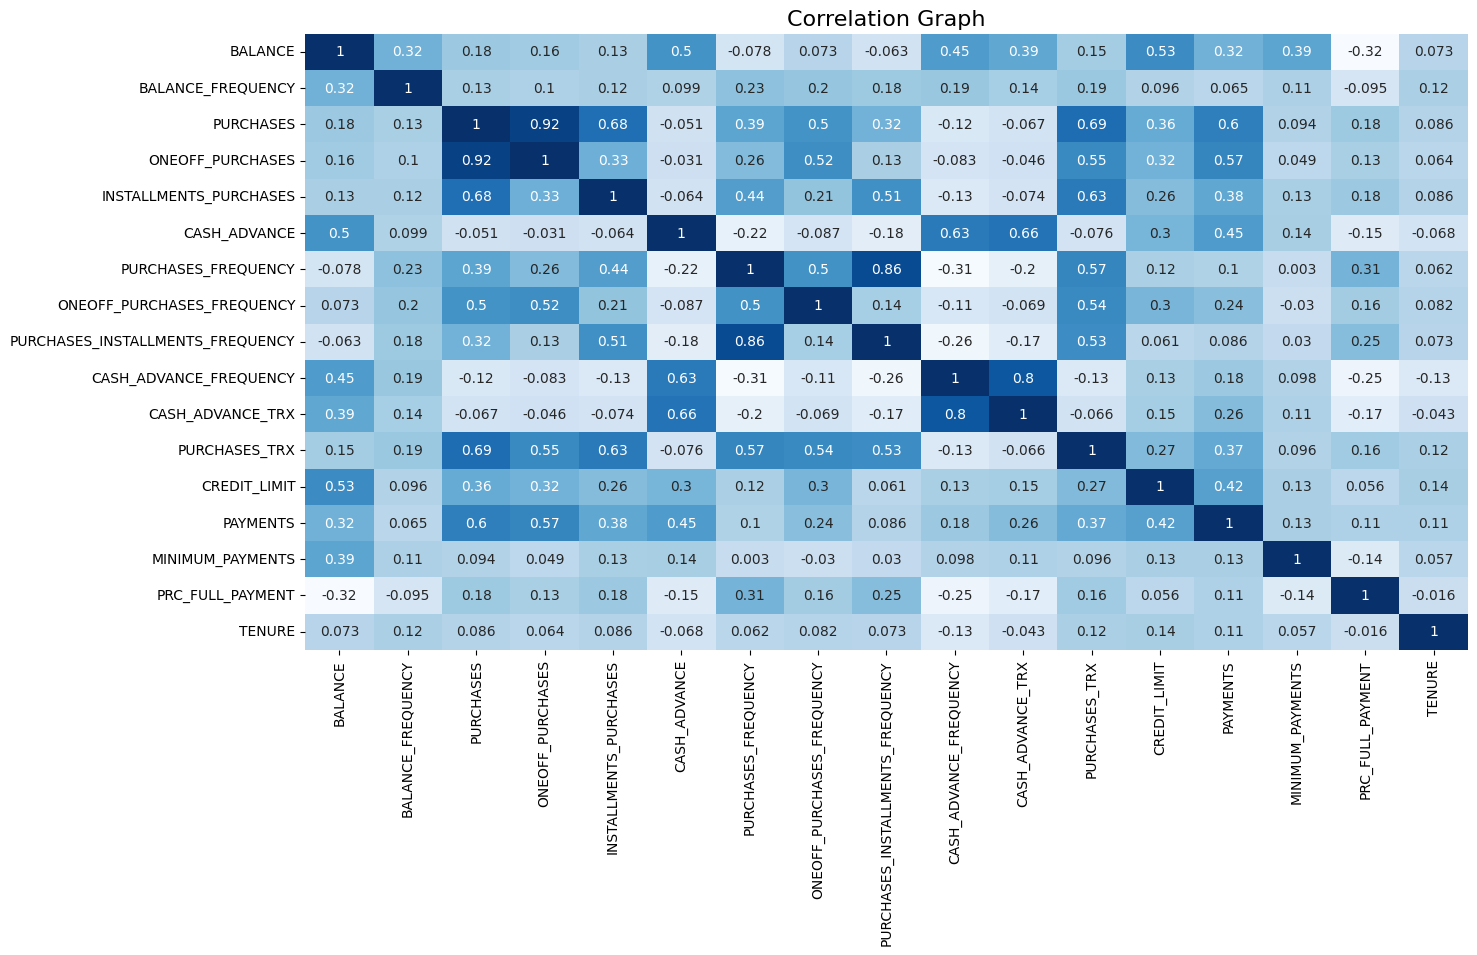

In [10]:
plt.figure (figsize = [15,8] ,  dpi = 100 )
plt.title ("Correlation Graph" , fontsize = 16)
sns.heatmap (data.corr(), annot = True, cmap = 'Blues', cbar = False)
plt.show ()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

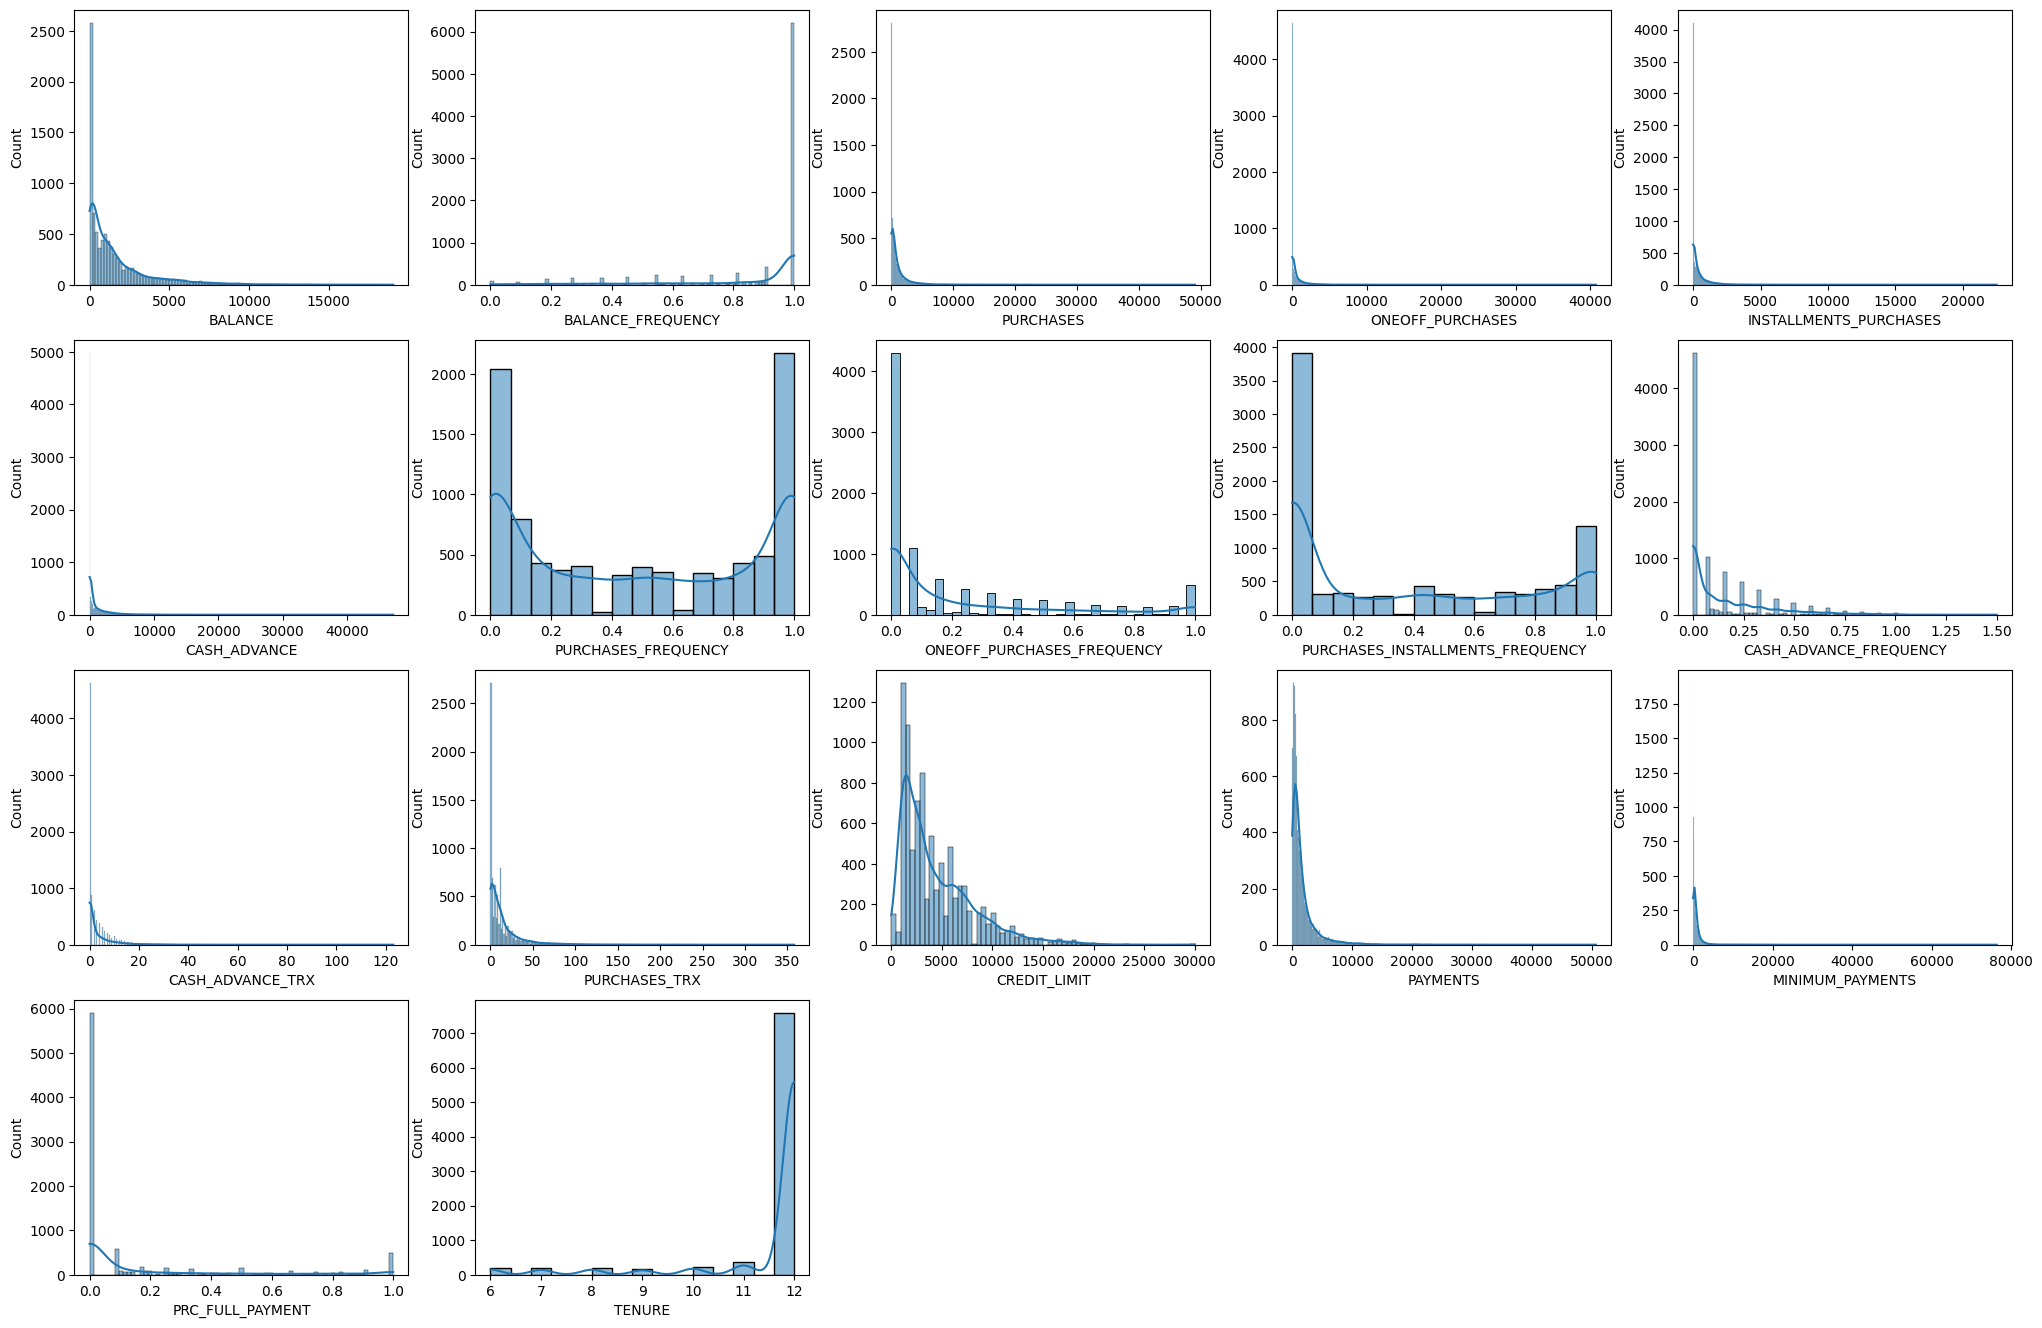

In [11]:
plt.figure(figsize=(25,25))
for i, col in enumerate(data.columns):
    ax = plt.subplot(6, 5, i+1)
    sns.histplot(data[col], kde=True)
    plt.xlabel(col)
plt.show()

In [12]:
#data[data['BALANCE'] < 8000].count() #8774
#data[data['CREDIT_LIMIT'] < 15000].count() #8764
#data[data['BALANCE_FREQUENCY'] == 1].count() #6211
#data[data['PAYMENTS'] < 10000].count() #8779
#data[data['TENURE'] == 12].count() #7584

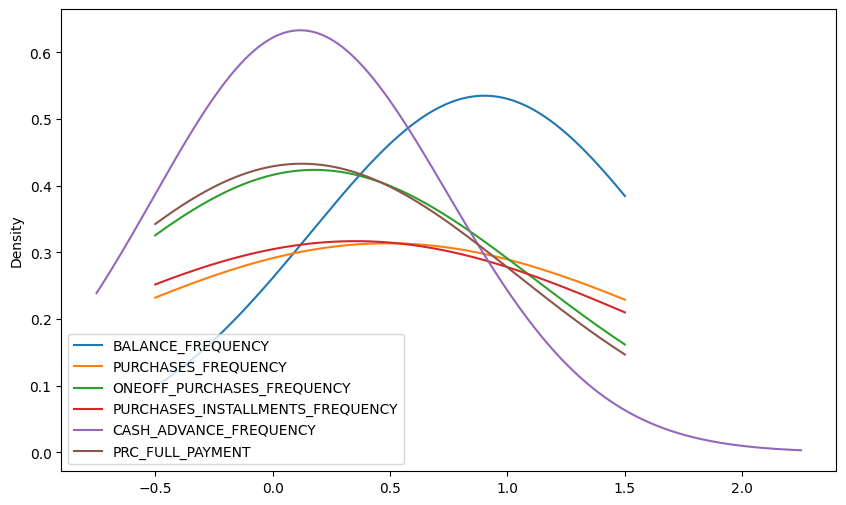

In [13]:
ax = data[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
         'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']].plot.kde(figsize=(10,6), bw_method=3)

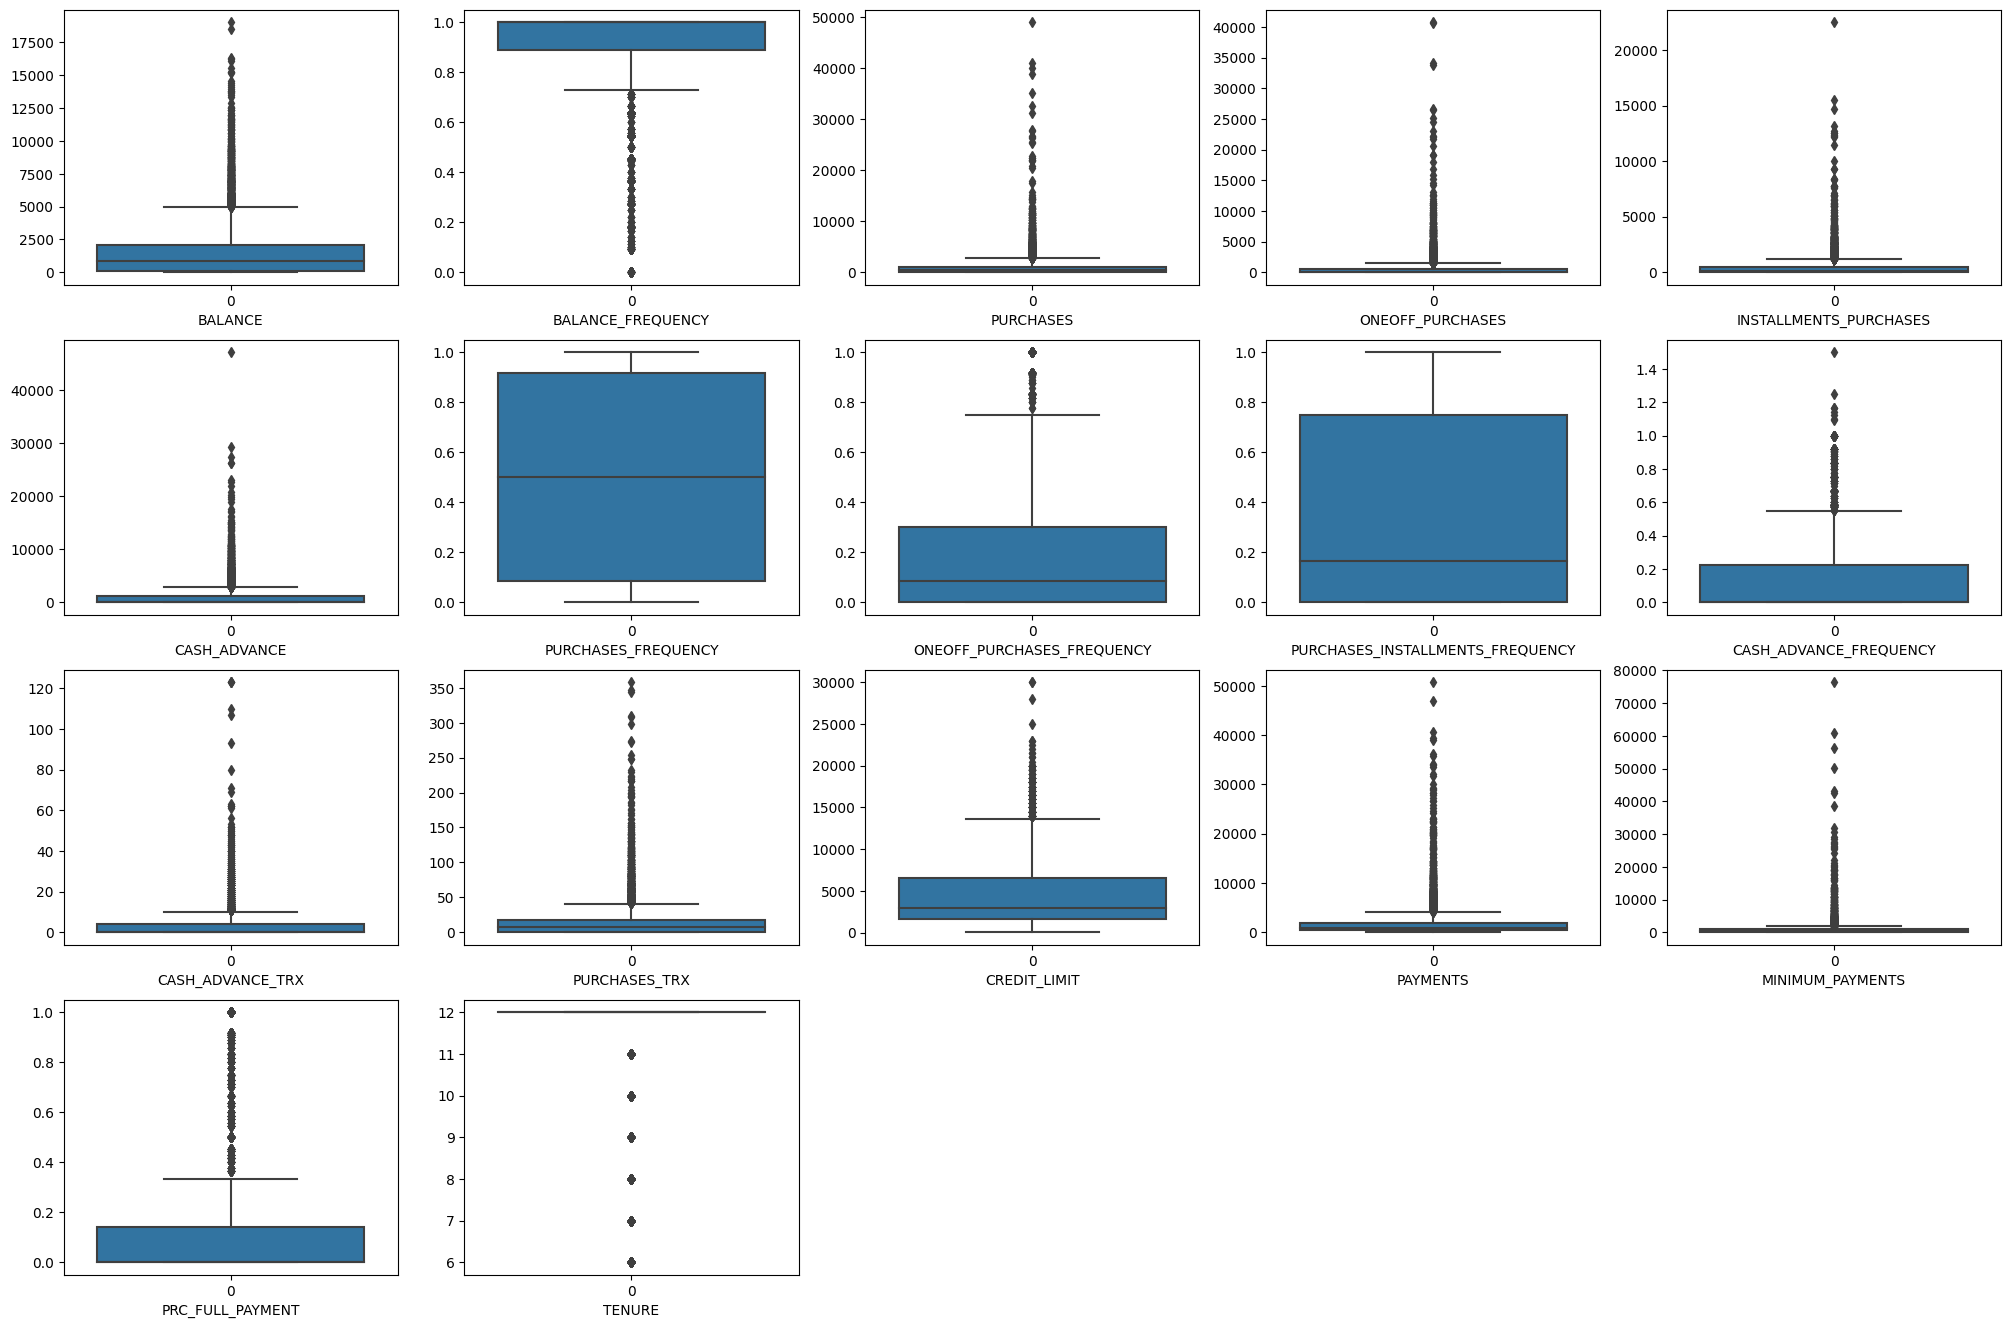

In [14]:
plt.figure(figsize=(25,25))
for i, col in enumerate(data.columns):
    ax = plt.subplot(6,5, i+1)
    sns.boxplot(data[col])
    plt.xlabel(col)

plt.show()

In [15]:
# find outlier in all columns
for i in data.select_dtypes(include=['float64','int64']).columns:
    max_thresold = data[i].quantile(0.95)
    min_thresold = data[i].quantile(0.05)
    df_no_outlier = data[(data[i] < max_thresold) & (data[i] > min_thresold)].shape
    print(" outlier in ",i,"is" ,int(((data.shape[0]-df_no_outlier[0])/data.shape[0])*100),"%")

 outlier in  BALANCE is 10 %
 outlier in  BALANCE_FREQUENCY is 75 %
 outlier in  PURCHASES is 27 %
 outlier in  ONEOFF_PURCHASES is 53 %
 outlier in  INSTALLMENTS_PURCHASES is 48 %
 outlier in  CASH_ADVANCE is 56 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 57 %
 outlier in  CASH_ADVANCE_TRX is 56 %
 outlier in  PURCHASES_TRX is 27 %
 outlier in  CREDIT_LIMIT is 14 %
 outlier in  PAYMENTS is 10 %
 outlier in  MINIMUM_PAYMENTS is 10 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 91 %


In [16]:
# Detecting outliers using the Inter Quantile Range(IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
#calc Lower bound and upper bound
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
# check if value bigger than upper bound, or smaller than Lower bound
No_Outliers = data[(data < LB) | (data > UB)].count()
print('Number of Outliers at each column:\n')
print('-'*50)
DF_outlier = pd.DataFrame(No_Outliers, columns=['(No. Outliers)'])
# To show whole rows
pd.set_option('display.max_rows', DF_outlier.shape[0]+1)
print(DF_outlier)

Number of Outliers at each column:

--------------------------------------------------
                                  (No. Outliers)
BALANCE                                      695
BALANCE_FREQUENCY                           1493
PURCHASES                                    808
ONEOFF_PURCHASES                            1013
INSTALLMENTS_PURCHASES                       867
CASH_ADVANCE                                1030
PURCHASES_FREQUENCY                            0
ONEOFF_PURCHASES_FREQUENCY                   782
PURCHASES_INSTALLMENTS_FREQUENCY               0
CASH_ADVANCE_FREQUENCY                       525
CASH_ADVANCE_TRX                             804
PURCHASES_TRX                                766
CREDIT_LIMIT                                 248
PAYMENTS                                     808
MINIMUM_PAYMENTS                             774
PRC_FULL_PAYMENT                            1474
TENURE                                      1366


**Comment:**

Based on the analysis of the provided dataset, several significant insights into credit card users' behaviors and financial status have been uncovered:
- **General Financial Status**: Nearly 98% of users have balances below 8000 (unit) and credit limits under 1500 (unit), indicating that most users maintain low balances and utilize credit limits conservatively. It seems most of the customers who use their Credit Card would maximize the usage of their credit balance, until it reach 0.
- **Shopping Behavior**: Purchase amounts (*PURCHASES*) is the sum of one-off purchase (*ONEOFF_PURCHASES*), and installment purchase amounts (*INSTALLMENT_PURCHASES*) exhibit similar trends to balances and credit limits.
- **Purchase Frequency**: The data is categorized into three customer groups based on purchase frequency (*PURCHASES_FREQUENCY*), one-time purchase frequency (*ONEOFF_PURCHASES_FREQUENCY*), and installment purchase frequency (*PURCHASES_INSTALLMENT_FREQUENCY*). This segmentation provides insights into customers' purchasing habits, allowing for a deeper understanding of their behavior.
- **Payments and Spending**: Almost 98% of customers make payments below 10000, with minimum payments falling below 5000. Additionally, 85% of customers use their credit cards for a minimum of 12 months, indicating a consistent usage pattern.
- **Correlations**: Most variables exhibit positive correlations rather than negative ones. Some variables are strongly correlated, such as *PURCHASES* and *ONEOFF_PURCHASES*, suggesting that most customers make one-off purchases. Similar patterns are observed between *PURCHASES_FREQUENCY* and *PURCHASES_INSTALLMENTS_FREQUENCY*, indicating strong multicollinearity between them. However, since we're not using a regression model, this multicollinearity shouldn't pose a problem. *PURCHASES* and *PURCHASES_TRX* display a strong correlation, implying that the purchase amount correlates with the number of transactions. An interesting observation is the relationship between *CASH_ADVANCE* and *BALANCE*. It appears that customers with larger balances tend to use cash advances for payments. Customers with higher balances tend to have larger credit limits, as indicated by their positive correlation (0.54). *TENURE* shows weak correlations with other variables, suggesting that it may not be significantly influenced by customer behavior. This will be reevaluated during the PCA analysis.
- **Outliers**: Outliers are identified in the dataset, which could potentially impact clustering results. It's crucial to manage these outliers carefully to avoid losing valuable data



# 3. DATA PREPROCESSING

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
scaled_features = scaler.fit_transform (data)

In [18]:
scaled_features[1]

array([ 0.78696085,  0.13432467, -0.46955188, -0.35693402, -0.45457623,
        2.60560451, -1.22175806, -0.67866081, -0.91699519,  0.57396272,
        0.11007385, -0.59179588,  0.68863903,  0.81864213,  0.08931021,
        0.2342269 ,  0.36067954])

# 4. KMEANS CLUSTERING

In [19]:
!pip install --q kneed

In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from kneed import KneeLocator

In [21]:
# Kmeans algorithm settings
kmeans_set = {"init":"random", "n_init":10, "max_iter":300, "random_state":42}

# Find inertia for k cluster
inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

## 4.1. K-Elbow

In [22]:
def elbow_optimizer(inertias,name):

    kl = KneeLocator(range(1,11), inertias, curve='convex', direction="decreasing")
    plt.style.use("fivethirtyeight")
    sns.lineplot(x=range(1,11), y=inertias, marker='o')
    plt.xticks(range(1,11))
    plt.xlabel("Number of Clusters", labelpad=20)
    plt.ylabel("Inertia", labelpad=20)
    plt.title(f"Elbow Method for {name}", y=1.09)
    plt.axvline(x=kl.elbow, color = 'red', label='axvline-fullheight', ls='--')
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


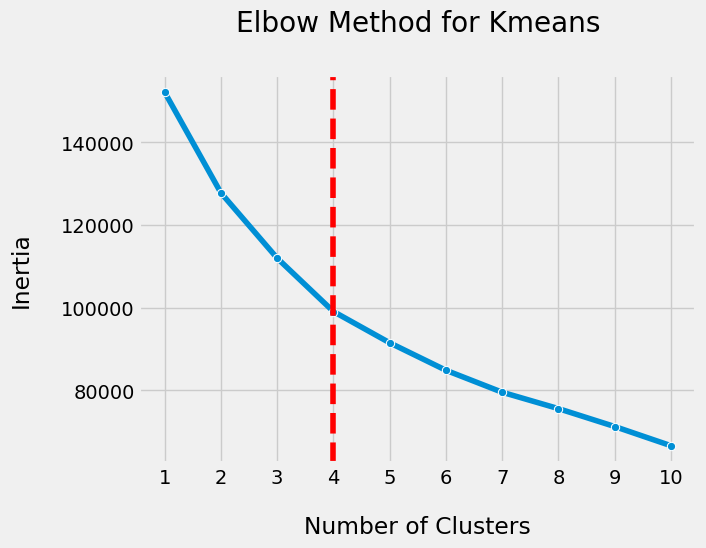

In [23]:
### Implement elbow_optimizer function for KMeans
elbow_optimizer(inertias, 'Kmeans')

**Comment**

I utilized the Elbow method to determine the optimal number of clusters for the KMeans algorithm, which resulted in 4 clusters. In addition to the Elbow method, I also employed the Silhouette and Calinski-Harabasz methods to identify the most suitable number of clusters for the KMeans algorithm.

## 4.2. Silhouette Score, Calinski Harabasz Score

In [24]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [25]:
# Calculate silhouette_score and calinski_harabasz_score
def silhouette_and_calinski_score(data_input):
    silhouette_coef = []
    for k in range(2,11):
        kmeans = KMeans(n_clusters=k, **kmeans_set)
        kmeans.fit(data_input)
        score = silhouette_score(data_input, kmeans.labels_)
        silhouette_coef.append(score)

    calinski_harabasz_coef = []
    for k in range(2,11):
        kmeans = KMeans(n_clusters=k, **kmeans_set)
        kmeans.fit(data_input)
        score = calinski_harabasz_score(data_input, kmeans.labels_)
        calinski_harabasz_coef.append(score)
    return silhouette_coef, calinski_harabasz_coef

In [26]:
def plot_evaluation(sh_score, ch_score, name, x=range(2,11)):
    """
    for draw evaluation plot include silhouette_score and calinski_harabasz_score.
        sh_score(list): include silhouette_score of models
        ch_score(list): include calinski_harabasz_score of models
        name(string): name of clustering algorithm
        x(list): has range of number for x axis
    """

    fig, ax = plt.subplots(1,2,figsize=(15,7), dpi=100)
    ax[0].plot(x, sh_score, marker='o', ms=9)
    ax[1].plot(x, ch_score, marker='o', ms=9)
    ax[0].set_xlabel("Number of Clusters", labelpad=20)
    ax[0].set_ylabel("Silhouette Coefficient", labelpad=20)
    ax[1].set_xlabel("Number of Clusters", labelpad=20)
    ax[1].set_ylabel("calinski Harabasz Coefficient", labelpad=20)
    plt.suptitle(f'Evaluate {name} Clustering',y=0.9)
    plt.tight_layout(pad=3)
    plt.show()

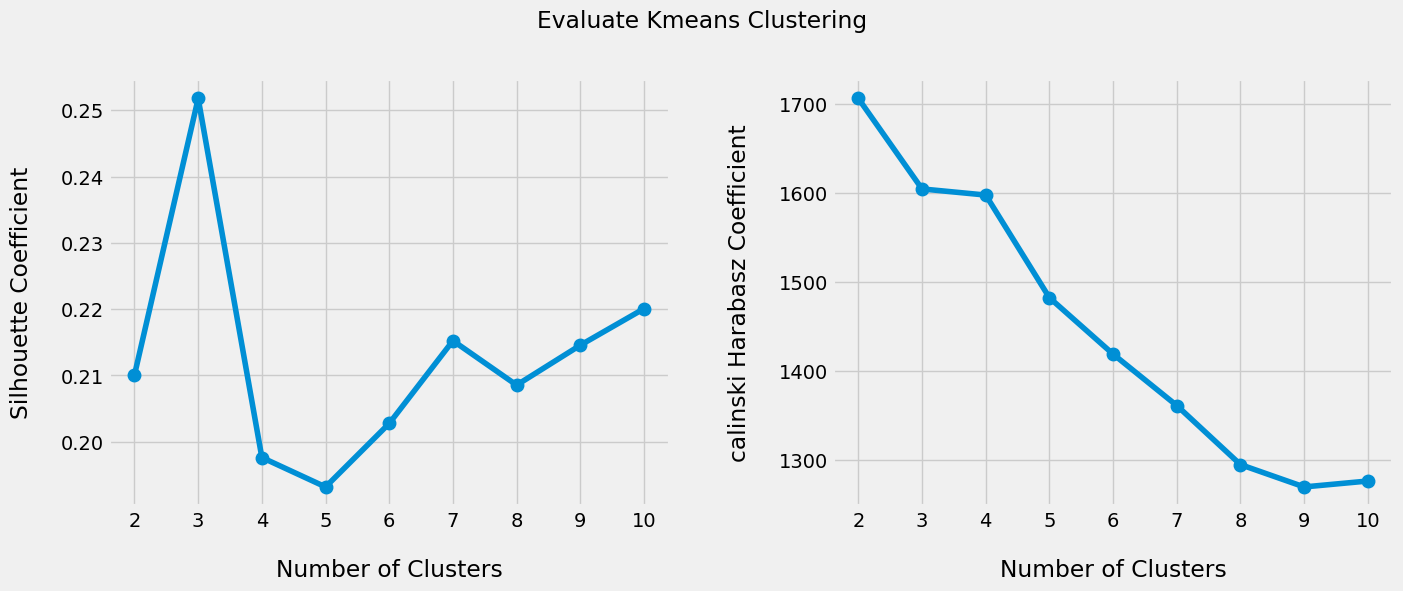

In [27]:
silhouette_coef, calinski_harabasz_coef = silhouette_and_calinski_score(scaled_features)
plot_evaluation(silhouette_coef, calinski_harabasz_coef, 'Kmeans')

In [28]:
silhouette_coef

[0.21006303333668366,
 0.25178745934850205,
 0.1976074492720698,
 0.1931688590154638,
 0.202755081788085,
 0.21522963769382036,
 0.20853465664037898,
 0.21455543651404646,
 0.22006831348889158]

In [29]:
calinski_harabasz_coef

[1706.139830675086,
 1604.3984342151036,
 1597.5222026386095,
 1482.1590031667513,
 1418.717373815264,
 1360.9061533648082,
 1294.52058642714,
 1269.420110350051,
 1276.0742692819604]

**Comments:**

Observing the results from the two additional methods mentioned above, it is evident from the two charts that the appropriate number of clusters is 3. (The higher the value, the more suitable the number of clusters.) With the Calinski-Harabasz method, the number of clusters could be either 3 or 4. Therefore, I will proceed to check the KMeans algorithm with k = {3, 4} to determine which cluster number is appropriate.

## 4.3. With K-Cluster = 3

In [30]:
kmeans = KMeans(n_clusters = 3, random_state = 29)
y_kmeans = kmeans.fit(scaled_features)
labels = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
kmeans.cluster_centers_.shape

(3, 17)

In [32]:
df_cluster = pd.concat([data, pd.DataFrame({'cluster':labels})], axis = 1)

In [33]:
centroids = pd.DataFrame(data = kmeans.cluster_centers_,columns = [data.columns])
centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.367396,-0.177663,-0.232898,-0.204408,-0.175047,-0.309514,-0.062796,-0.234992,-0.048401,-0.334251,-0.298804,-0.243583,-0.336467,-0.284403,-0.135429,0.007045,-0.028208
1,0.318798,0.439955,1.527871,1.279683,1.261207,-0.247131,1.143105,1.559745,0.957043,-0.358687,-0.251049,1.680394,0.891538,0.835329,0.155336,0.494645,0.303246
2,1.161463,0.340325,-0.290464,-0.207468,-0.305709,1.377858,-0.644545,-0.307119,-0.555630,1.559078,1.339837,-0.367625,0.599350,0.443301,0.398847,-0.410076,-0.126713


In [34]:
df_centroids = scaler.inverse_transform(centroids)
df_centroids = pd.DataFrame(data = df_centroids,columns = [data.columns])
df_centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,799.771040,0.835184,505.615025,253.161504,252.774371,329.805632,0.465148,0.132355,0.345201,0.068257,1.209709,8.655280,3270.246492,909.825781,548.594759,0.155775,11.479568
1,2228.026120,0.981492,4267.525421,2716.449393,1551.561464,460.625971,0.949134,0.667760,0.744791,0.063367,1.535599,56.478155,7738.228155,4151.340126,1226.211303,0.298390,11.923139
2,3981.961277,0.957891,382.624762,248.083296,134.618954,3868.303195,0.231664,0.110838,0.143616,0.447132,12.392231,5.572055,6675.128161,3016.457991,1793.702161,0.033774,11.347744


In [35]:
df_cluster_summary = df_cluster.groupby('cluster').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

df_cluster_summary = pd.DataFrame(df_cluster_summary.T.values[1:], columns = list(df_cluster_summary.T))

In [36]:
#df_cluster_summary.info()
col = list(df_cluster_summary)
df_cluster_summary[col] = df_cluster_summary[col].astype(float)
df_cluster_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,799.702576,0.835188,505.532394,253.120131,252.733061,329.866776,0.465072,0.132333,0.345145,0.068316,1.211636,8.653865,3269.793763,909.729614,548.525315,0.155750,11.478836
1,2220.003291,0.981477,4268.520980,2717.828543,1551.178267,458.421147,0.949093,0.668166,0.744584,0.063014,1.528745,56.472065,7733.967611,4151.276172,1224.538588,0.298632,11.923077
2,3989.326804,0.957980,384.528277,248.718133,135.887632,3869.856855,0.232290,0.110942,0.144242,0.447176,12.390351,5.612155,6682.960242,3018.907202,1795.687341,0.033774,11.350877


In [37]:
err = sum(sum(abs(df_cluster_summary.values - df_centroids.values)))
print(err)

44.953911355580225


In [38]:
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


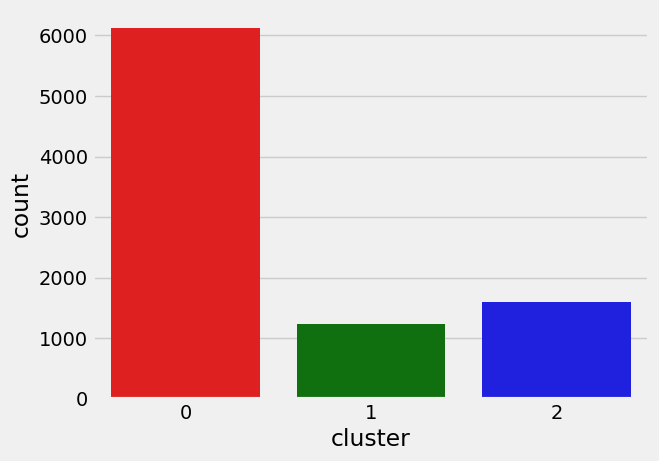

In [39]:
sns.countplot(x=df_cluster.cluster, palette =['red','green','blue'])
plt.show()

## 4.4. With K-Cluster = 4

In [40]:
kmeans = KMeans(n_clusters = 4, random_state = 29)
y_kmeans = kmeans.fit(scaled_features)
labels = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
kmeans.cluster_centers_.shape

(4, 17)

In [42]:
df_cluster = pd.concat([data, pd.DataFrame({'cluster':labels})], axis = 1)

In [43]:
centroids = pd.DataFrame(data = kmeans.cluster_centers_,columns = [data.columns])
centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.265124,-0.368498,-0.343133,-0.230485,-0.387692,-0.182166,-0.797514,-0.389442,-0.713979,-0.101056,-0.164396,-0.474814,-0.334455,-0.261784,-0.119179,-0.258928,-0.052764
1,-0.321755,0.242492,0.109083,0.000939,0.255974,-0.366732,0.983944,0.317283,0.874358,-0.463030,-0.360443,0.297022,-0.077076,-0.138802,-0.091816,0.395230,0.057654
2,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.429882,1.919096,0.477421,0.454703,0.324140
3,1.459738,0.384642,-0.234471,-0.163753,-0.253648,1.689647,-0.504769,-0.212550,-0.450162,1.746927,1.618157,-0.283457,0.839667,0.604574,0.491129,-0.406268,-0.097529


In [44]:
df_centroids = scaler.inverse_transform(centroids)
df_centroids = pd.DataFrame(data = df_centroids,columns = [data.columns])
df_centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1012.641956,0.789977,270.095923,209.879852,60.482959,596.861466,0.170270,0.086280,0.080684,0.114922,2.126948,2.907743,3277.563545,975.304518,586.464879,0.077983,11.446707
1,894.768927,0.934715,1236.263333,593.995933,642.541696,209.816318,0.885255,0.297109,0.711930,0.042487,0.789067,22.092692,4214.013741,1331.325429,650.233383,0.269313,11.594474
2,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
3,4602.795247,0.968389,502.252865,320.641328,181.696475,4522.139944,0.287762,0.139050,0.185532,0.484722,14.291562,7.664160,7549.502544,3483.325191,2008.762146,0.034888,11.386800


In [45]:
df_cluster_summary = df_cluster.groupby('cluster').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')
df_summary = df_cluster_summary.copy()

df_cluster_summary = pd.DataFrame(df_cluster_summary.T.values[1:], columns = list(df_cluster_summary.T))

In [46]:
#df_cluster_summary.info()
col = list(df_cluster_summary)
df_cluster_summary[col] = df_cluster_summary[col].astype(float)
df_cluster_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1011.839396,0.789924,270.144981,209.932625,60.479311,596.300906,0.170250,0.086301,0.080662,0.114888,2.125974,2.907468,3277.256169,975.330332,586.261175,0.078002,11.446568
1,894.768927,0.934715,1236.263333,593.995933,642.541696,209.816318,0.885255,0.297109,0.711930,0.042487,0.789067,22.092692,4214.013741,1331.325429,650.233383,0.269313,11.594474
2,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
3,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312


In [47]:
err = sum(sum(abs(df_cluster_summary.values - df_centroids.values)))
print(err)

9.715175417040598


In [48]:
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


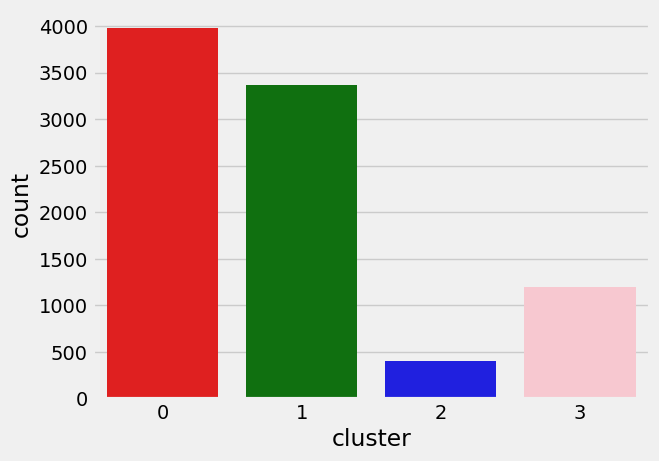

In [49]:
sns.countplot(x=df_cluster.cluster, palette = ['red','green','blue','pink'])
plt.show()


**Comment:**

After attempting to construct KMeans with k-cluster = {3, 4}, it's observed that k-cluster = 4 yields a lower error than k-cluster = 3 (9.71 < 44.95). Conclusion: I will opt for k-cluster = 4 for this dataset.

# 4.5. PCA

In [50]:
from sklearn.decomposition import PCA

In [51]:
def pca_kdims_for4cluster(kdims, input_data):
    pca = PCA(n_components=len(data.columns))
    pca.fit(input_data)
    pca = PCA(n_components=kdims)
    if kdims == 2:
        pca_df = pd.DataFrame(pca.fit_transform(input_data), columns=["pca_1", "pca_2"])#tạo ra dataframe với 2 thành phàn là pca1, pca2
        pca_df_kmeans = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
        pca_df_centroids = pd.DataFrame(pca.fit_transform(centroids), columns=["pca_1", "pca_2"])
        plt.figure(figsize=(10,10))
        plt.style.use('ggplot')
        ax = sns.scatterplot(x="pca_1", y="pca_2", hue = "cluster", data = pca_df_kmeans, palette =['red','green','blue','pink'])
        plt.scatter(x="pca_1", y="pca_2", data = pca_df_centroids, c ='yellow', s=50)
        plt.title('Clustering using K-Means Algorithm')

    if kdims == 3:
        pca_df = pd.DataFrame(pca.fit_transform(input_data), columns=["pca_1", "pca_2", 'pca_3'])
        pca_df_kmeans = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
        X = pca_df_kmeans.copy()
        cluster_colors = np.array(['red','green','blue','pink'])
        colors = cluster_colors[labels]
        plt.figure(figsize=(10, 10))
        ax = plt.subplot(projection="3d")
        ax.scatter(pca_df.pca_1, pca_df.pca_2, pca_df.pca_3, c=colors)
        plt.title('Clustering using K-Means Algorithm')

    return (plt.show())

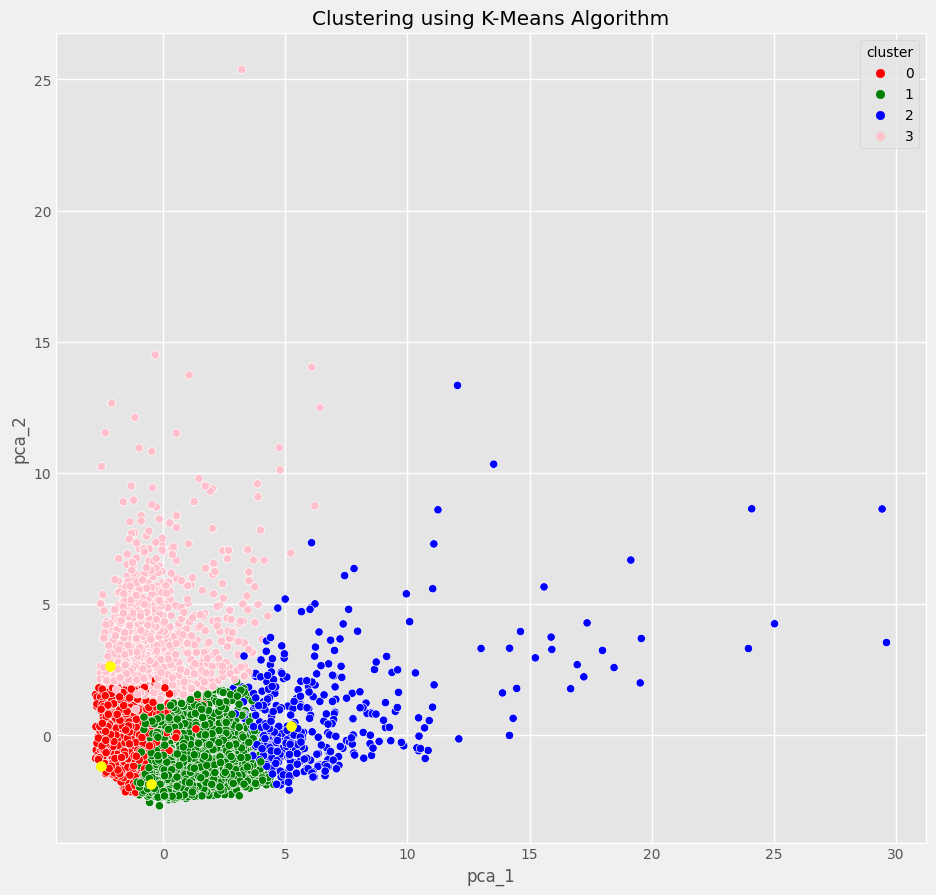

In [52]:
pca_kdims_for4cluster(2, scaled_features)

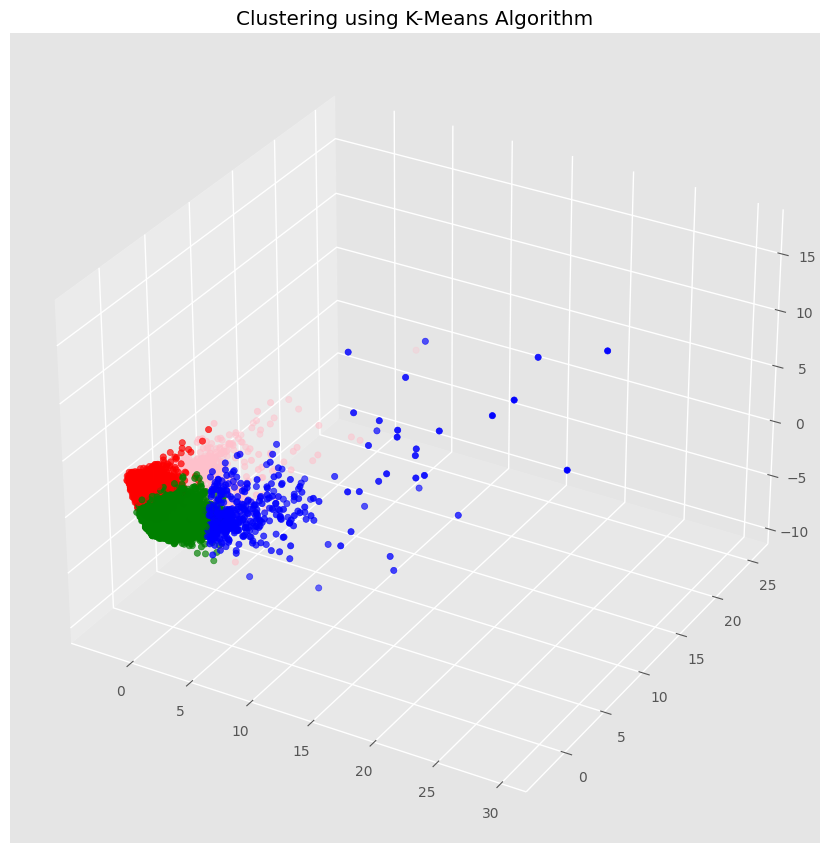

In [53]:
pca_kdims_for4cluster(3, scaled_features)

**Comment:**

Outliers belong to cluster 2 and cluster 3.

# 5. Analyzing after using K-Means algorithm

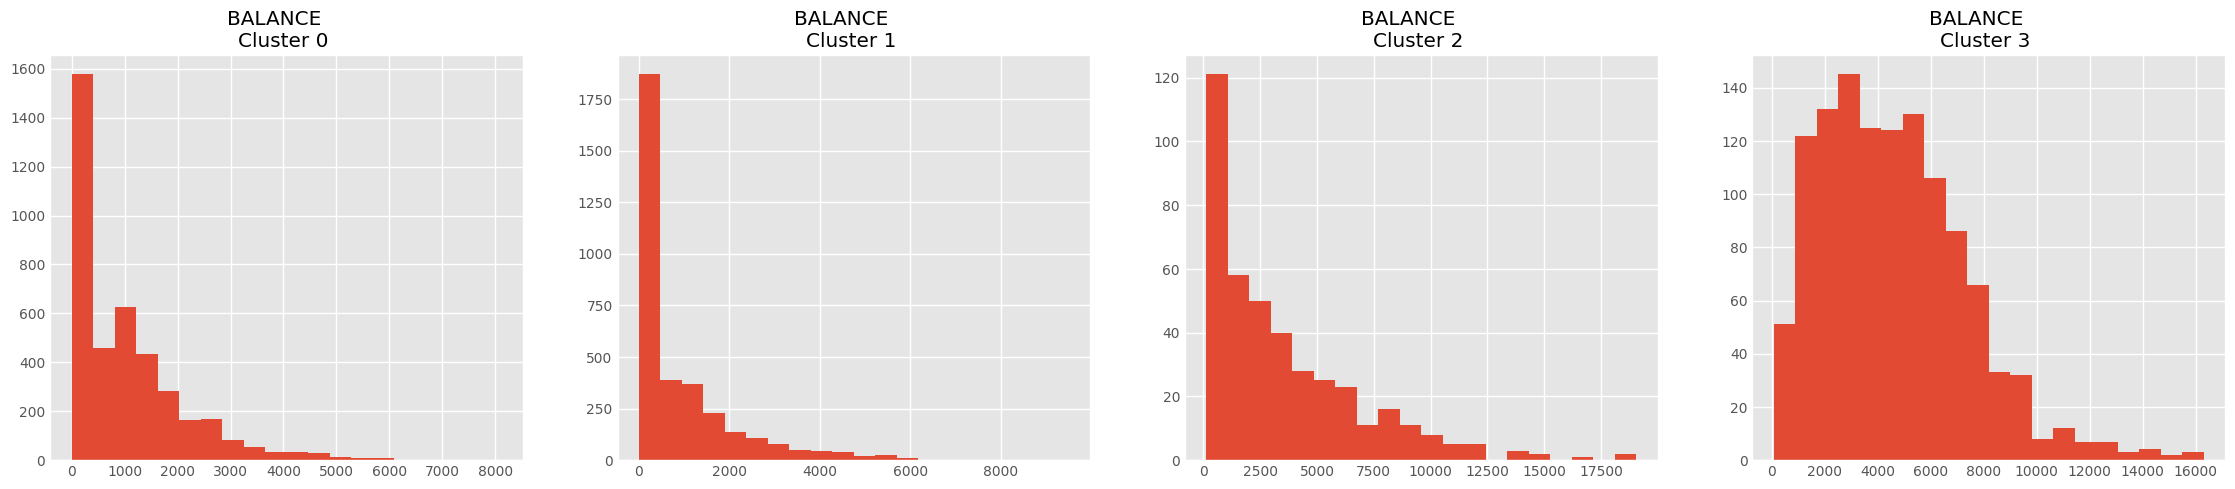

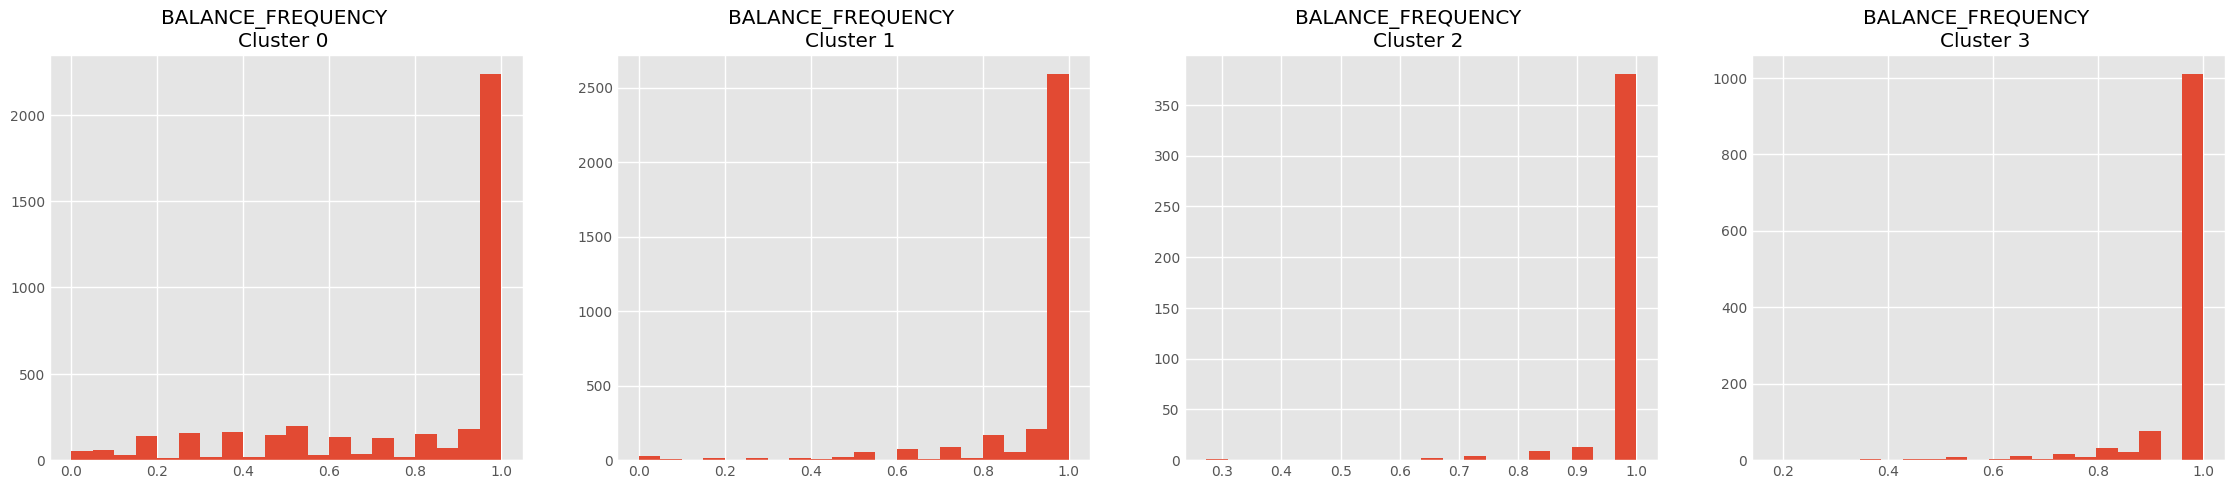

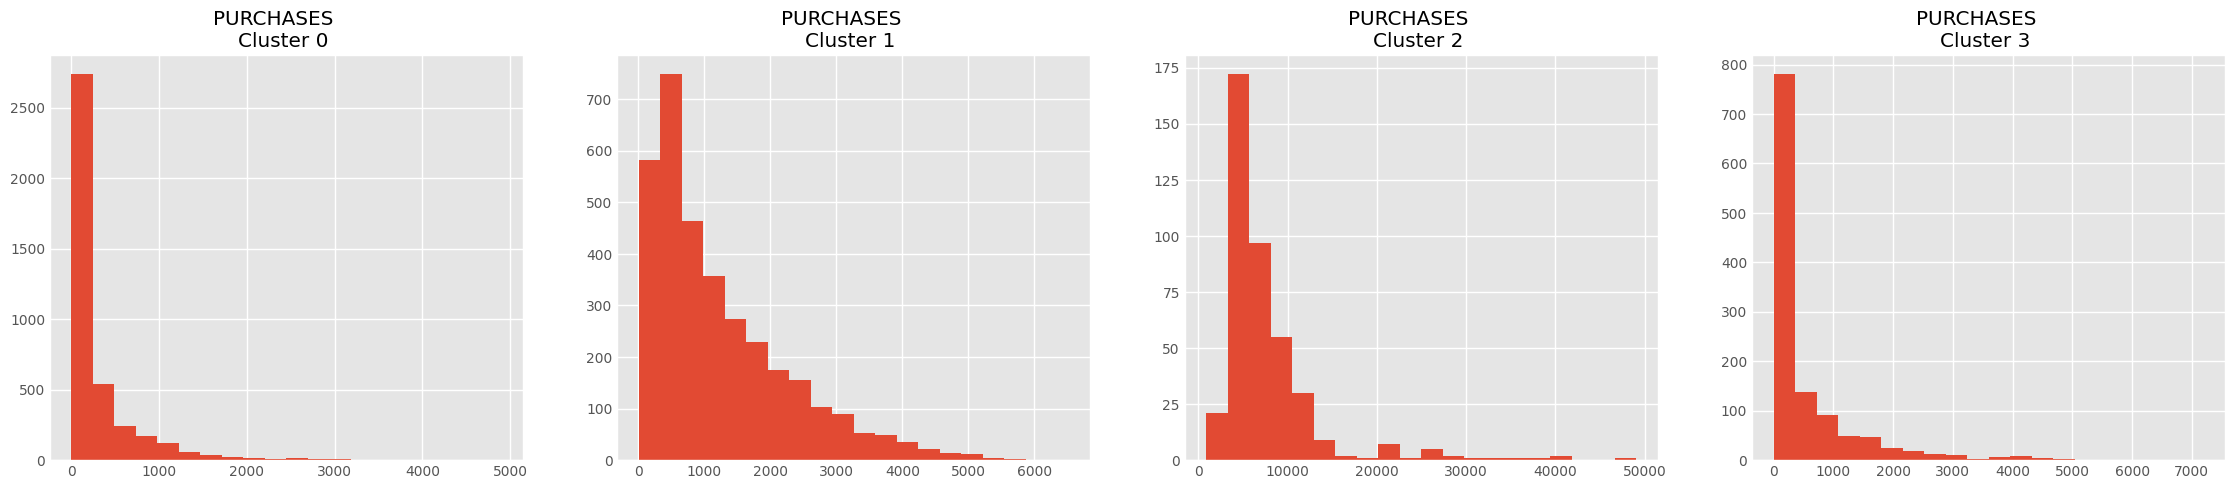

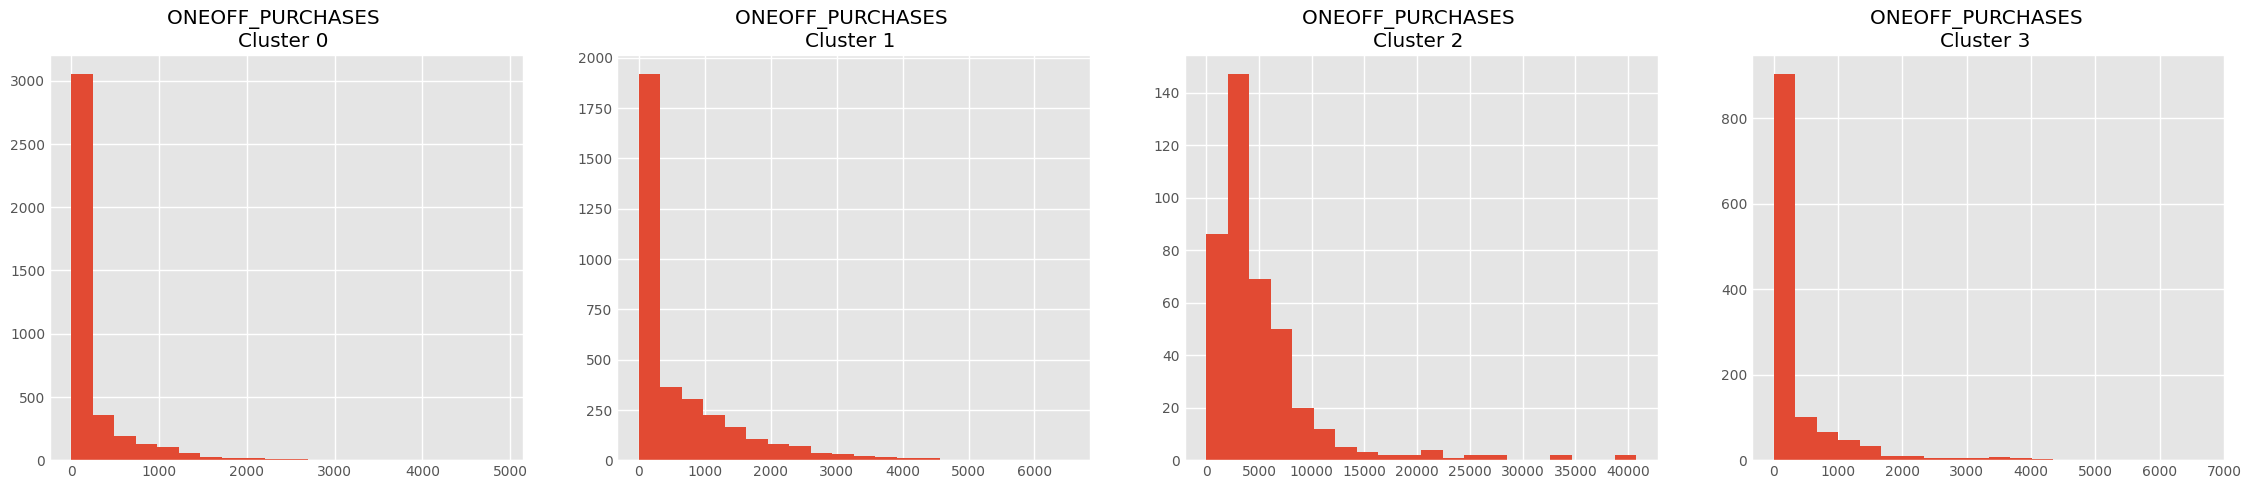

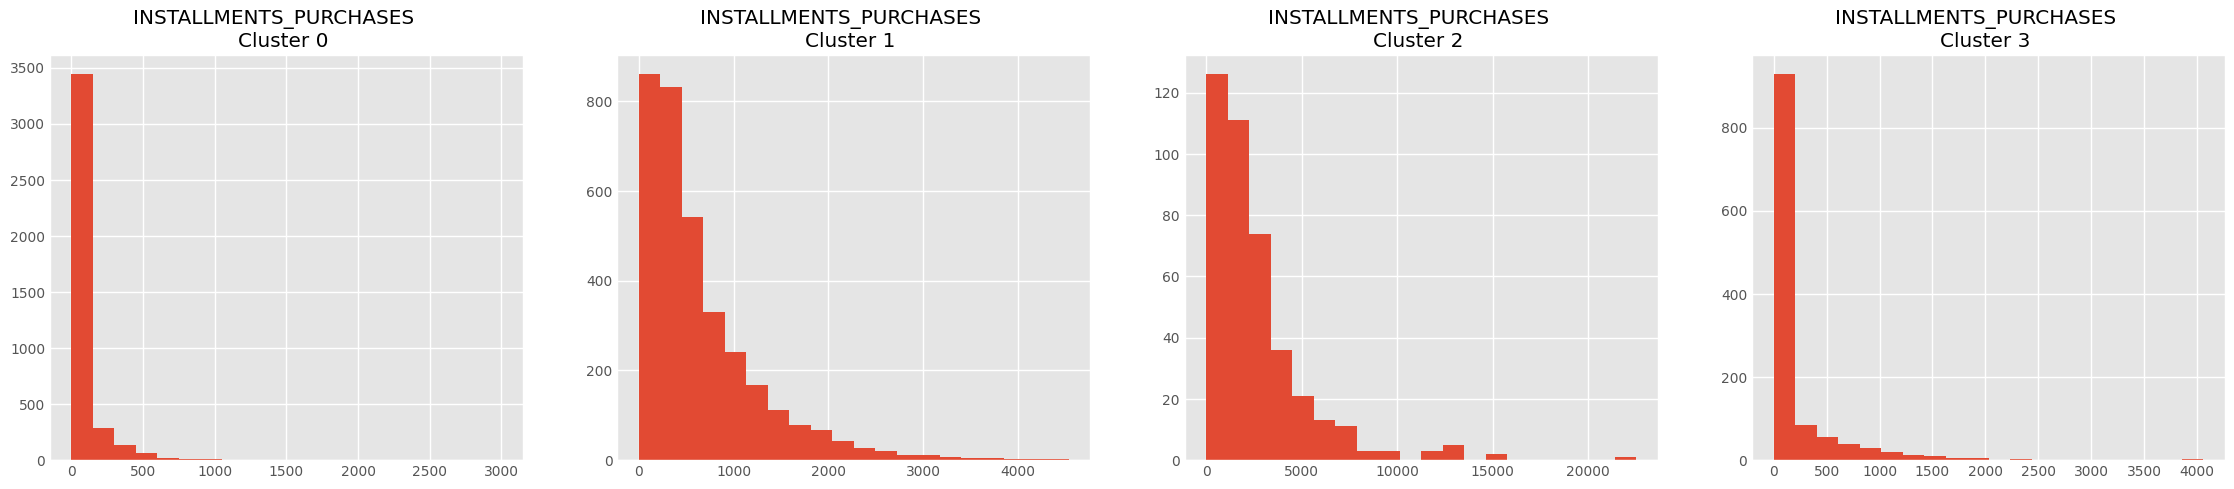

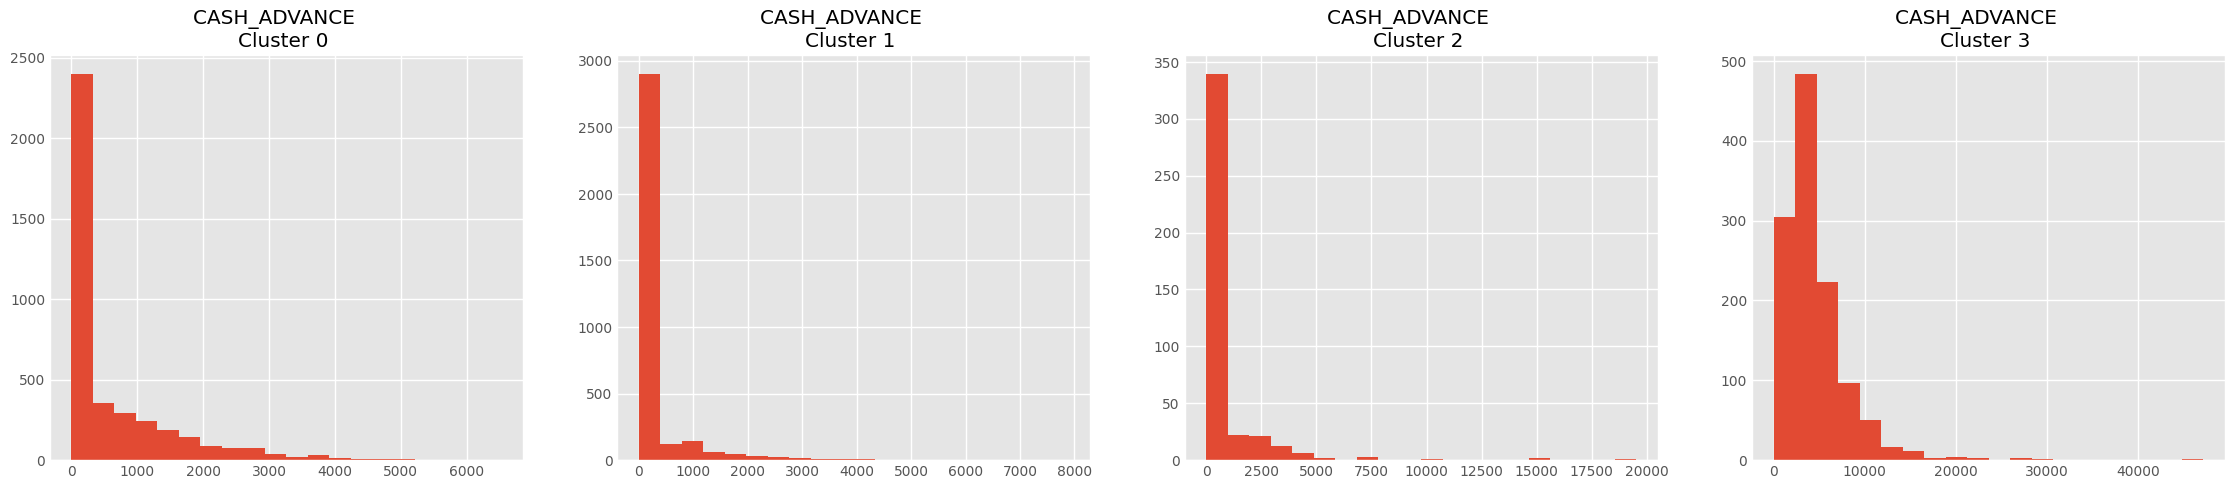

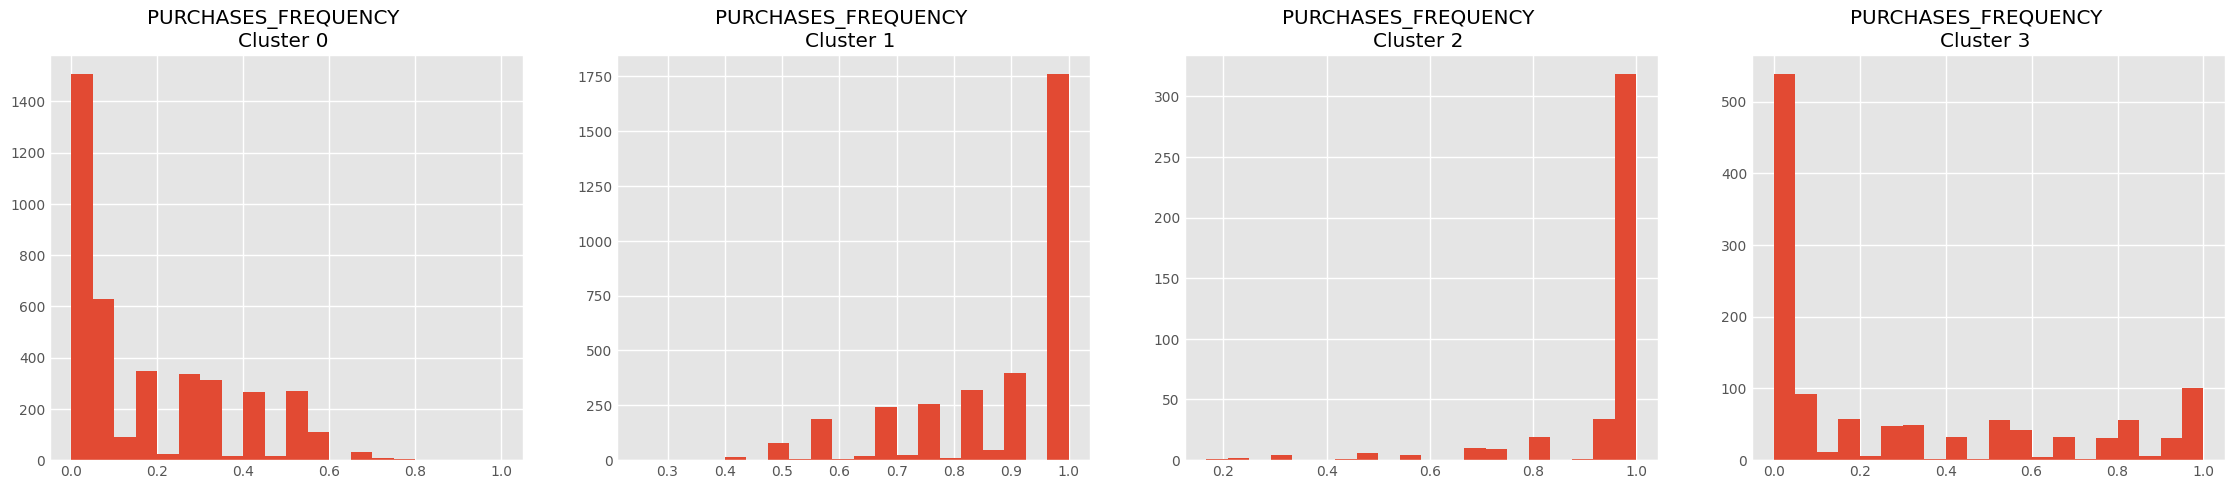

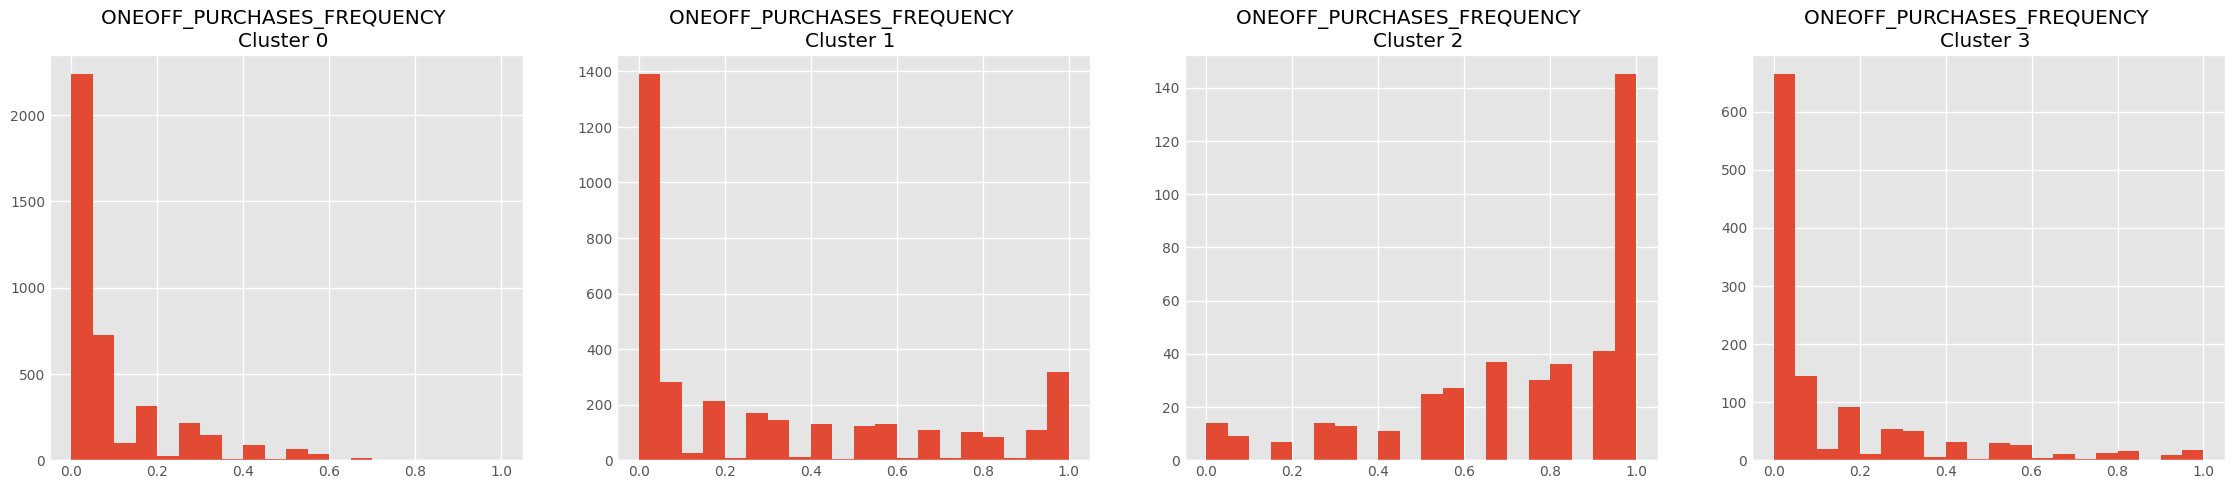

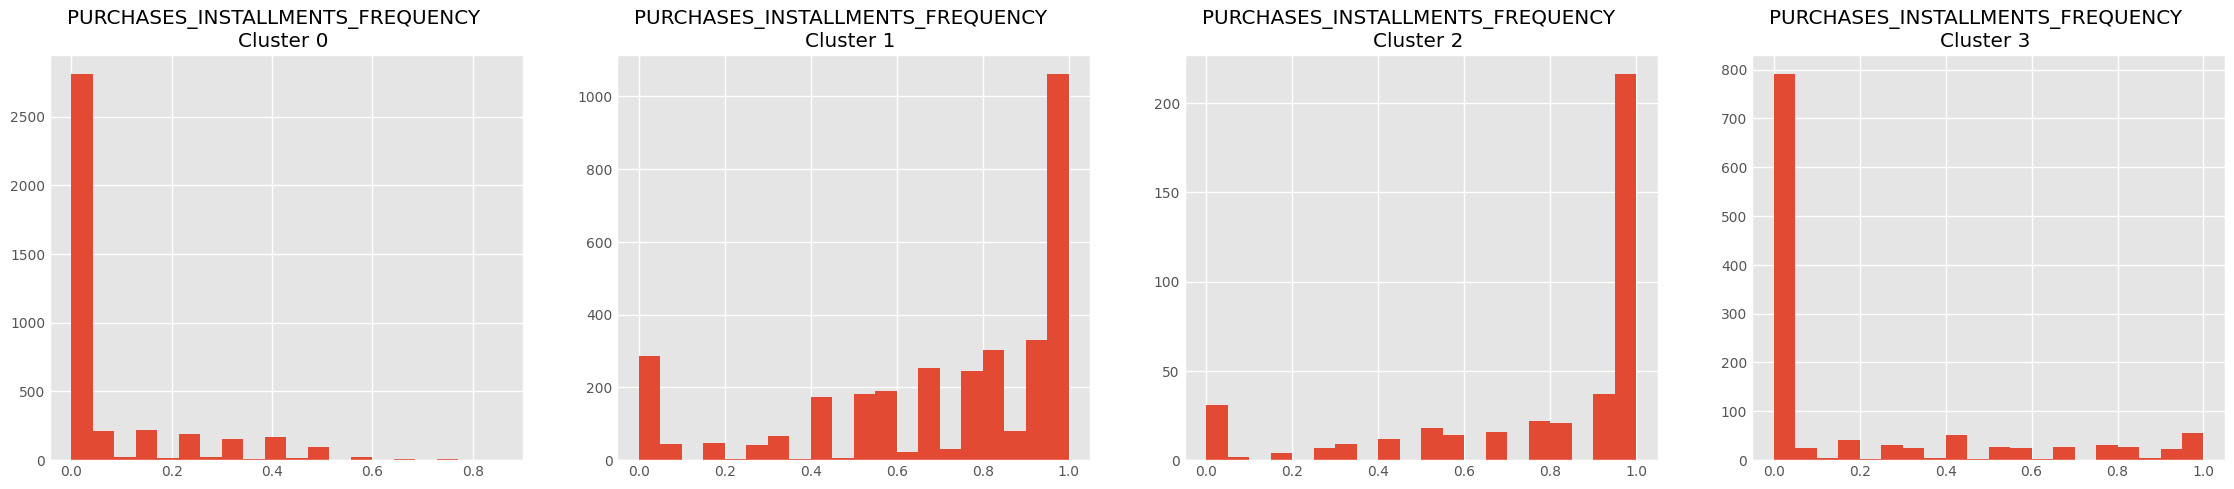

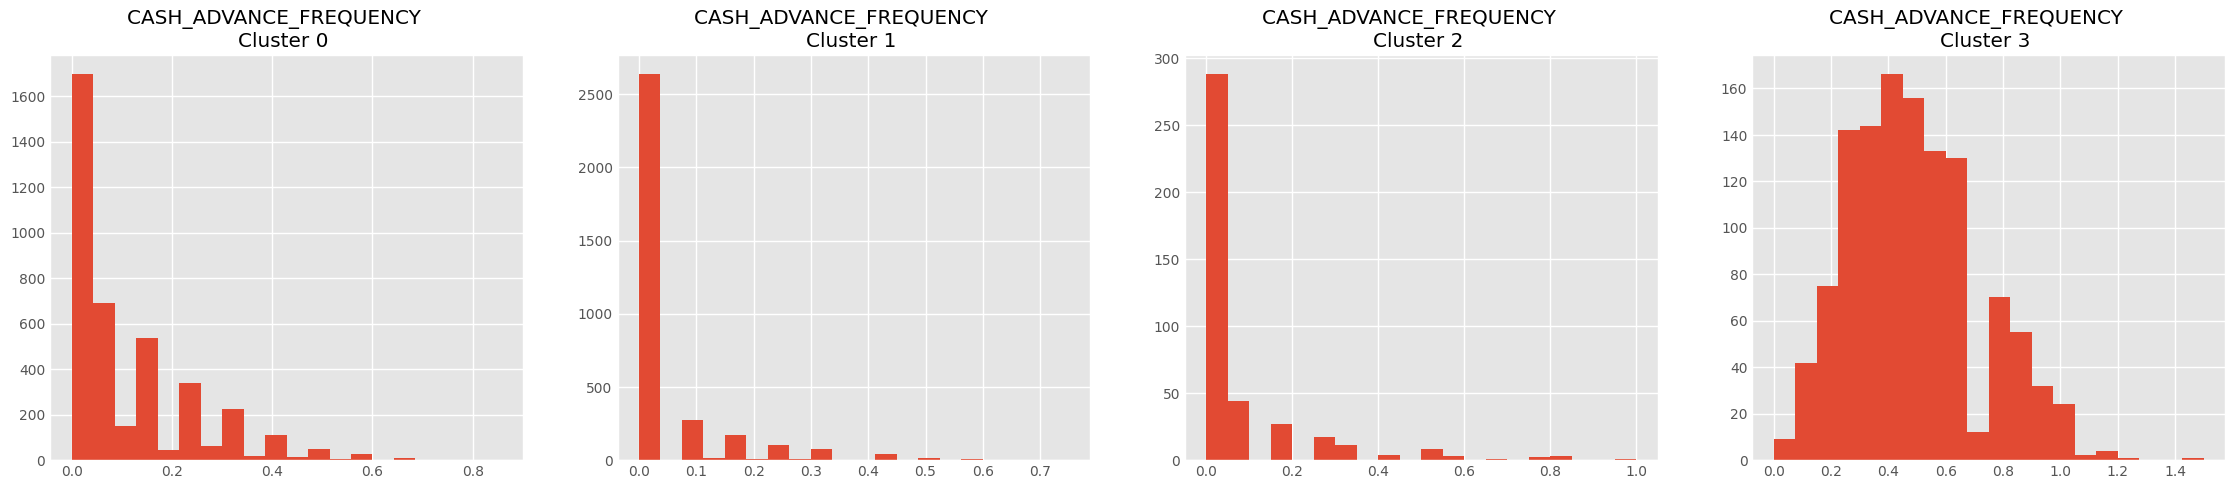

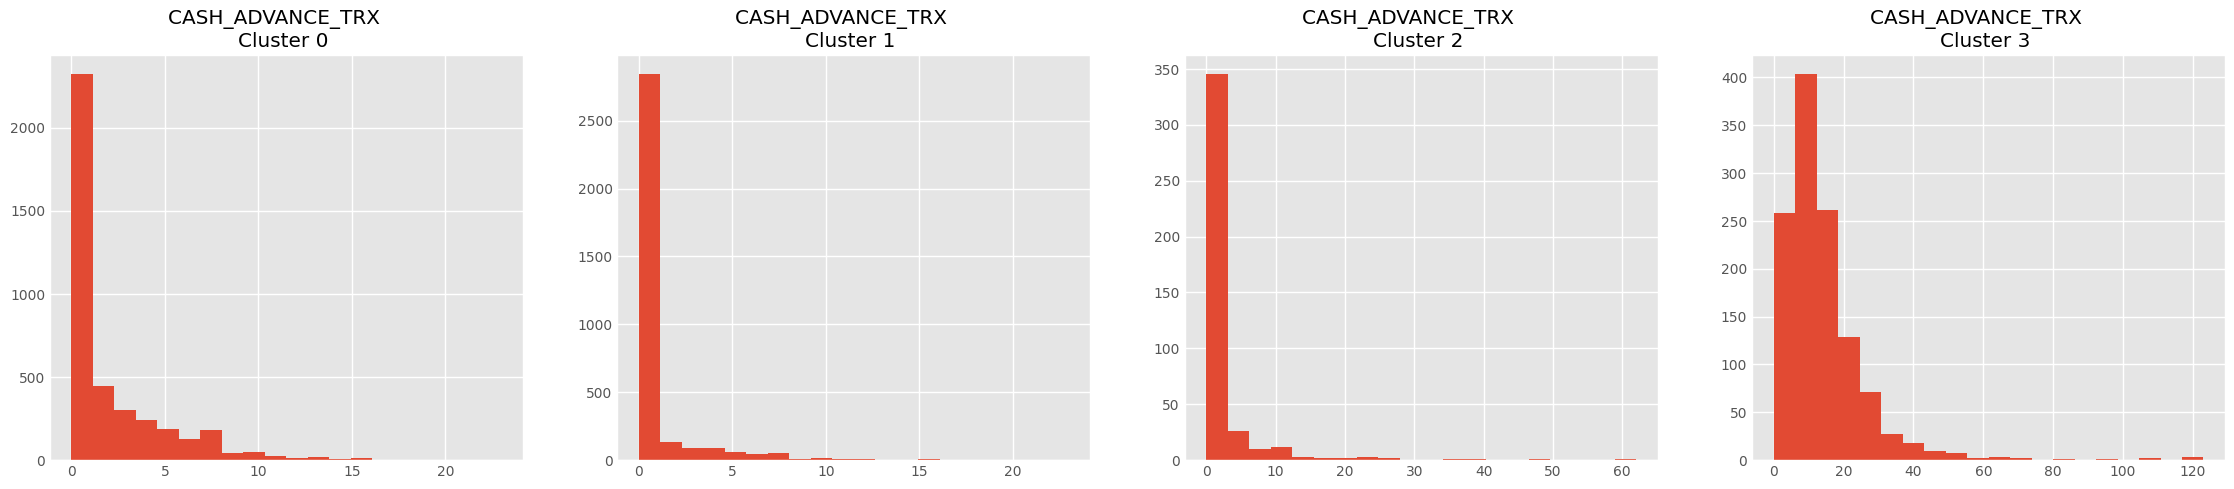

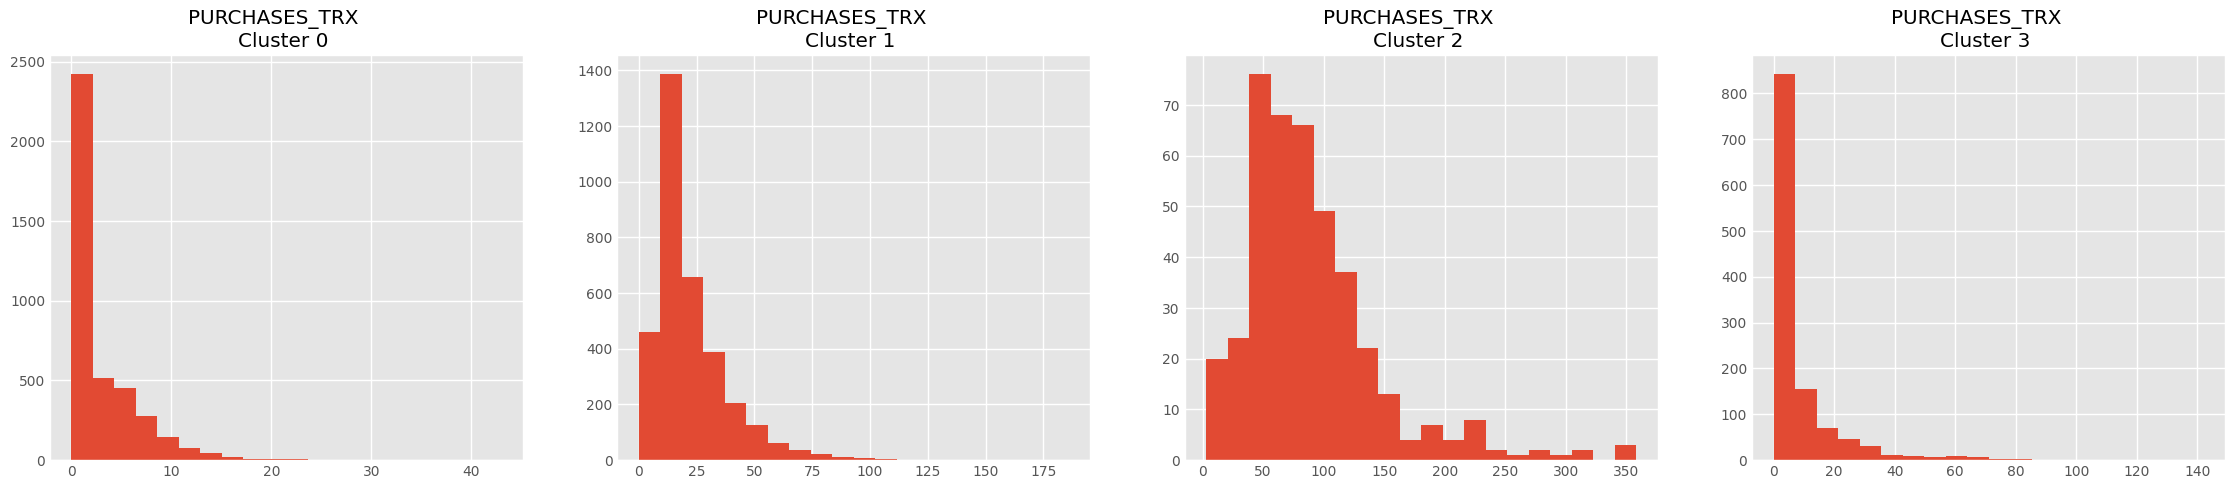

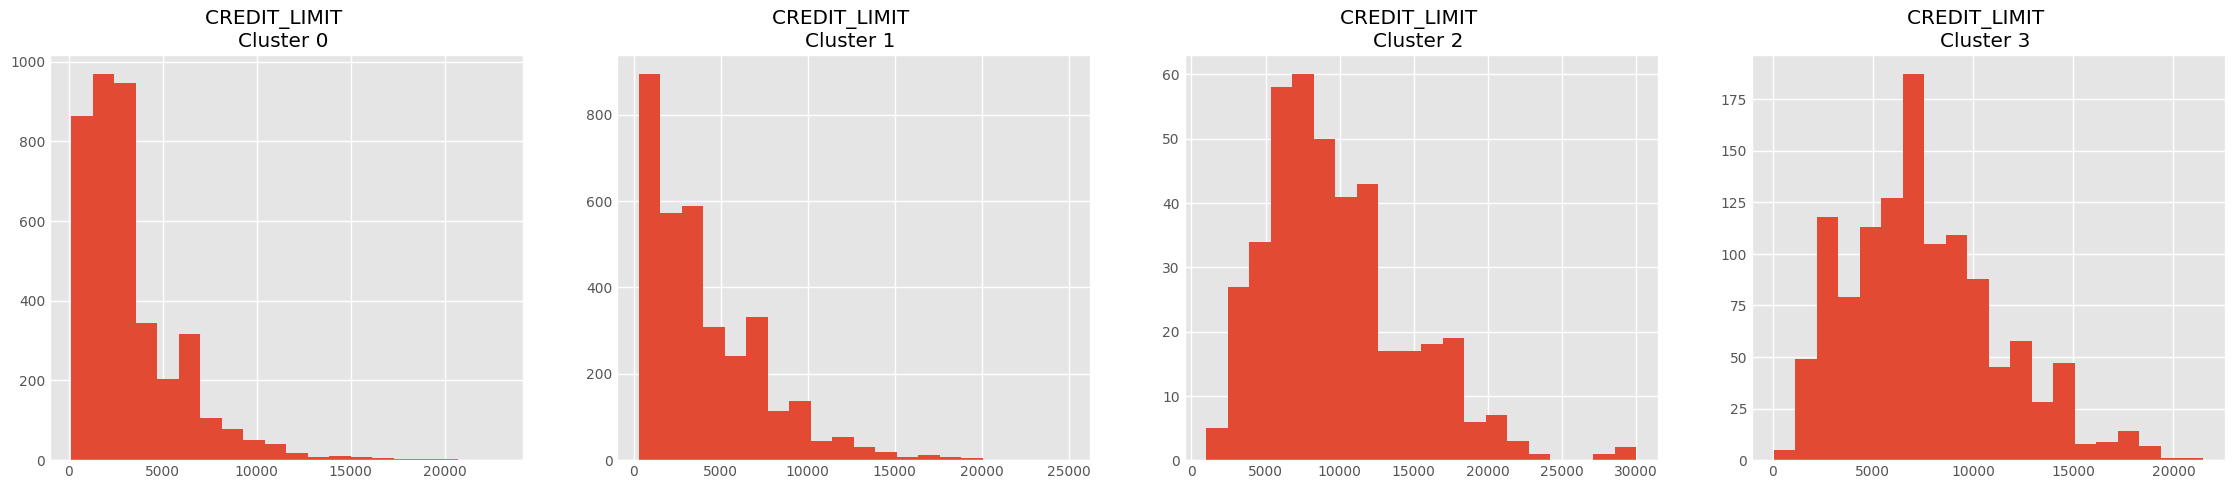

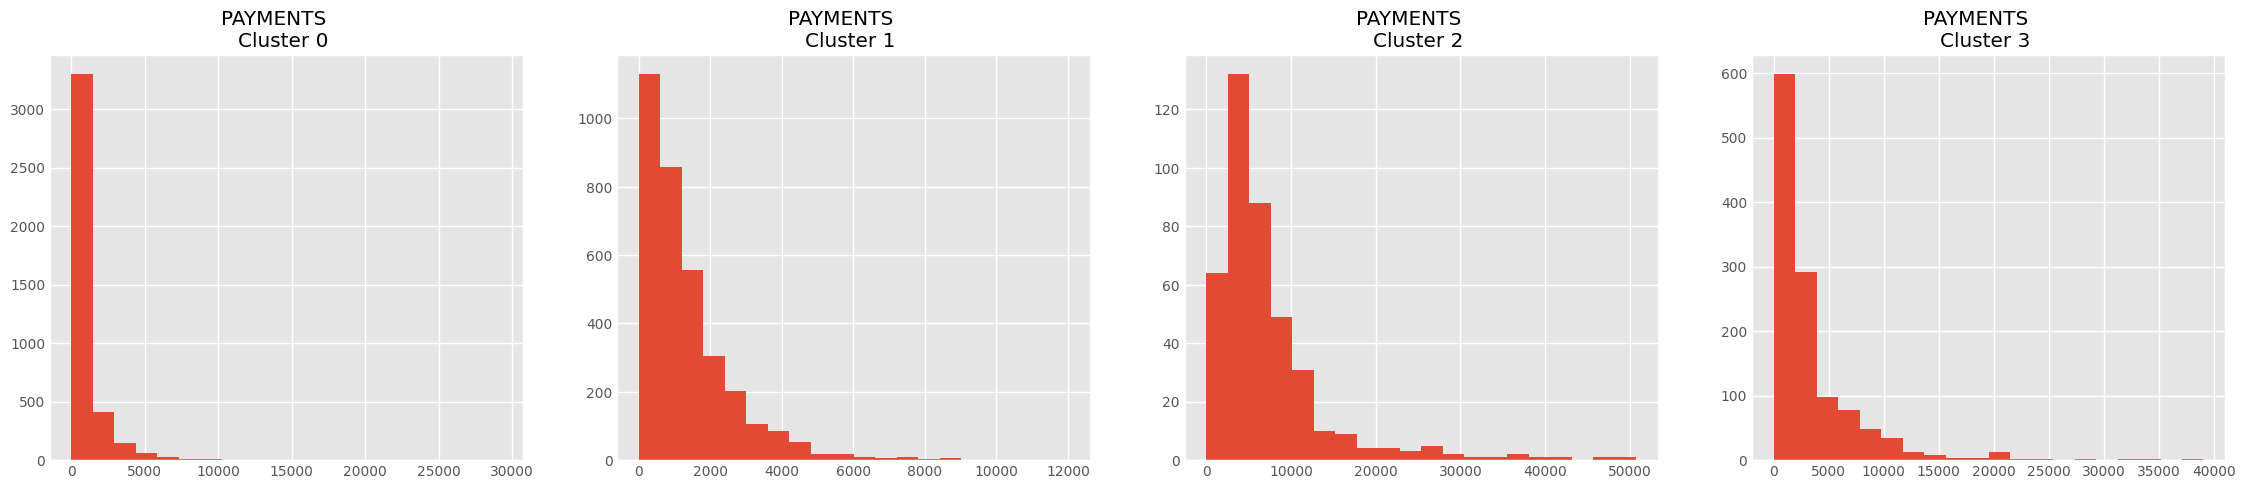

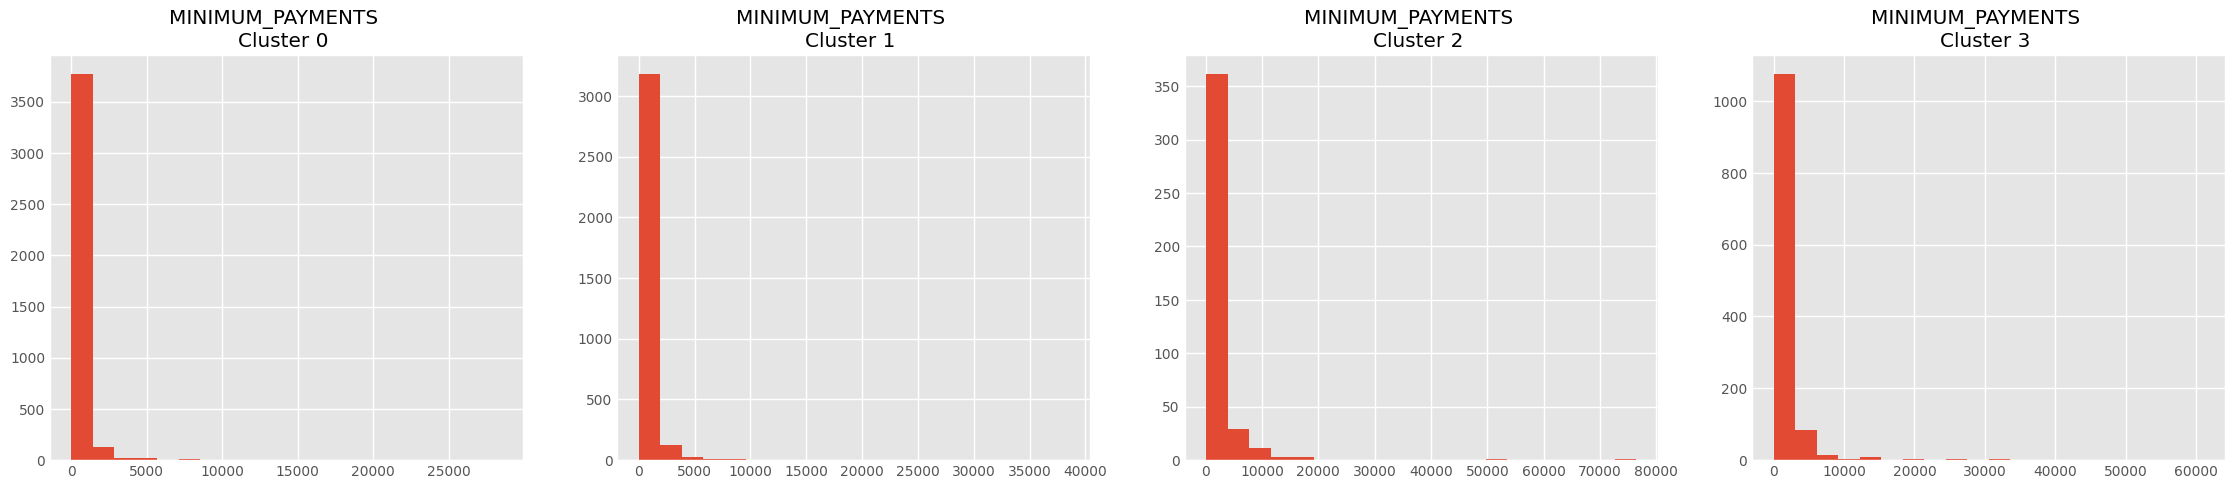

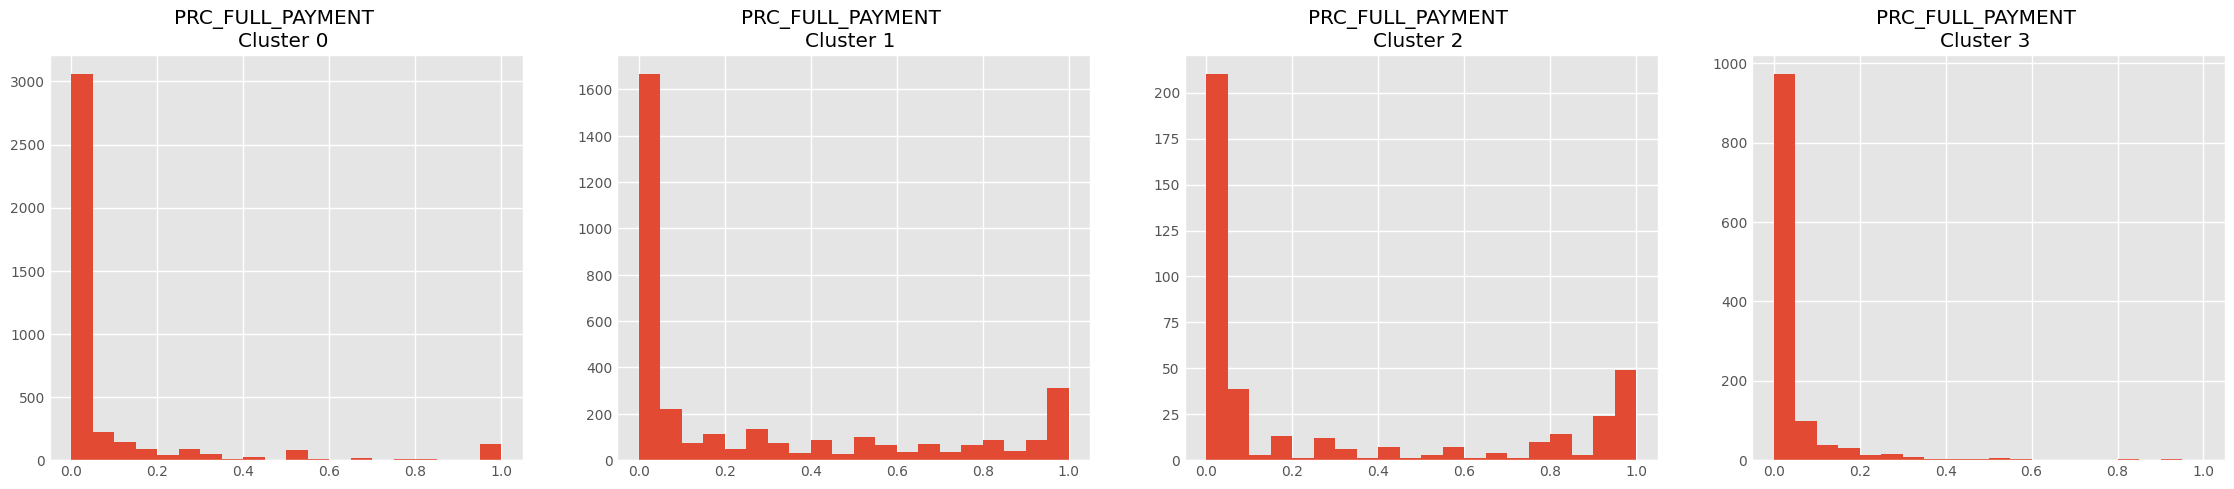

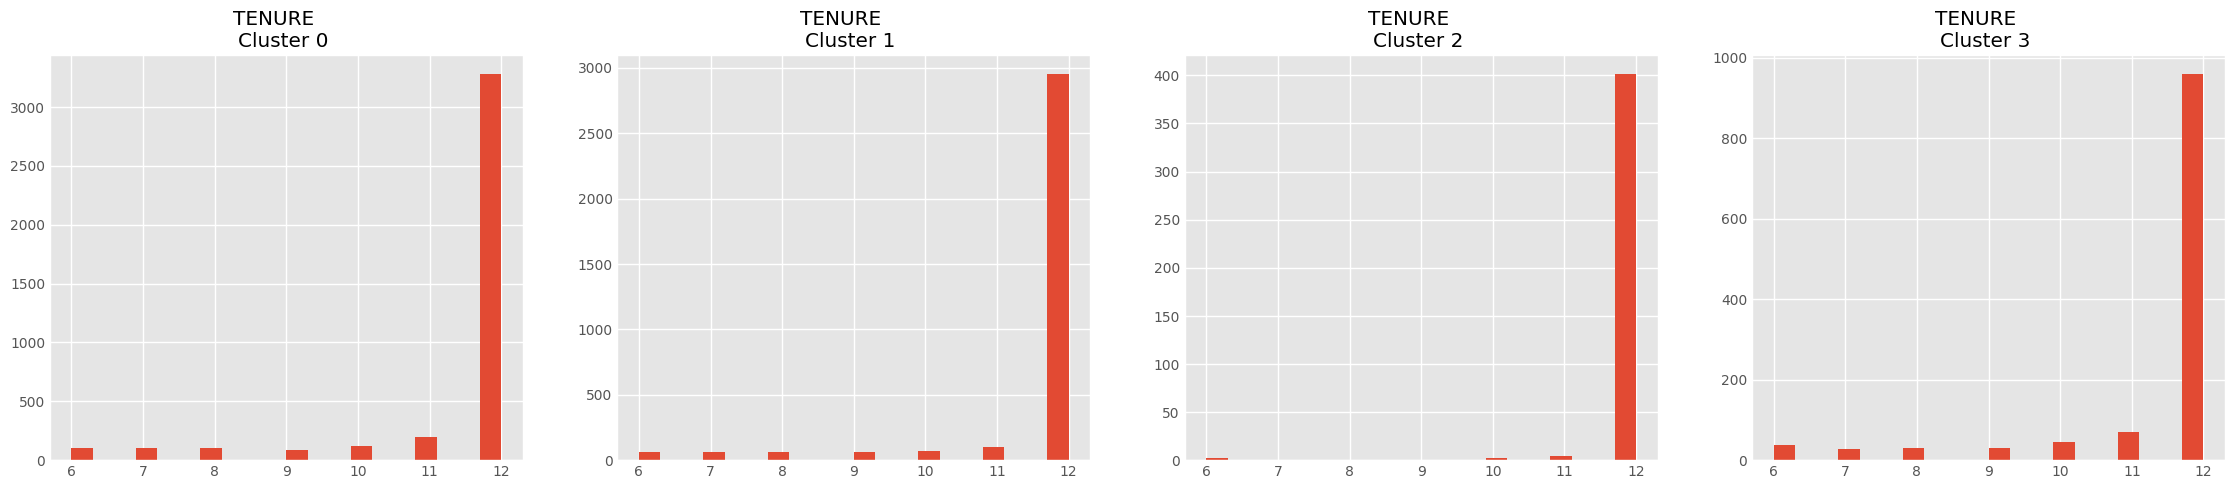

In [54]:
# Plot the histogram of various clusters
for i in data.columns:
  plt.figure(figsize = (25, 5))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()

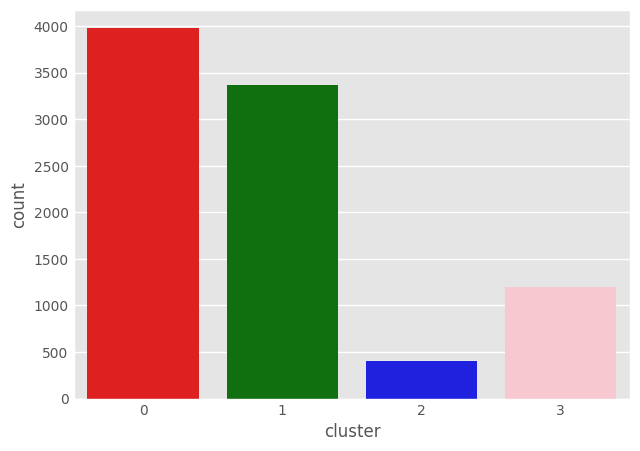

In [55]:
sns.countplot(x=df_cluster.cluster, palette = ['red','green','blue','pink'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

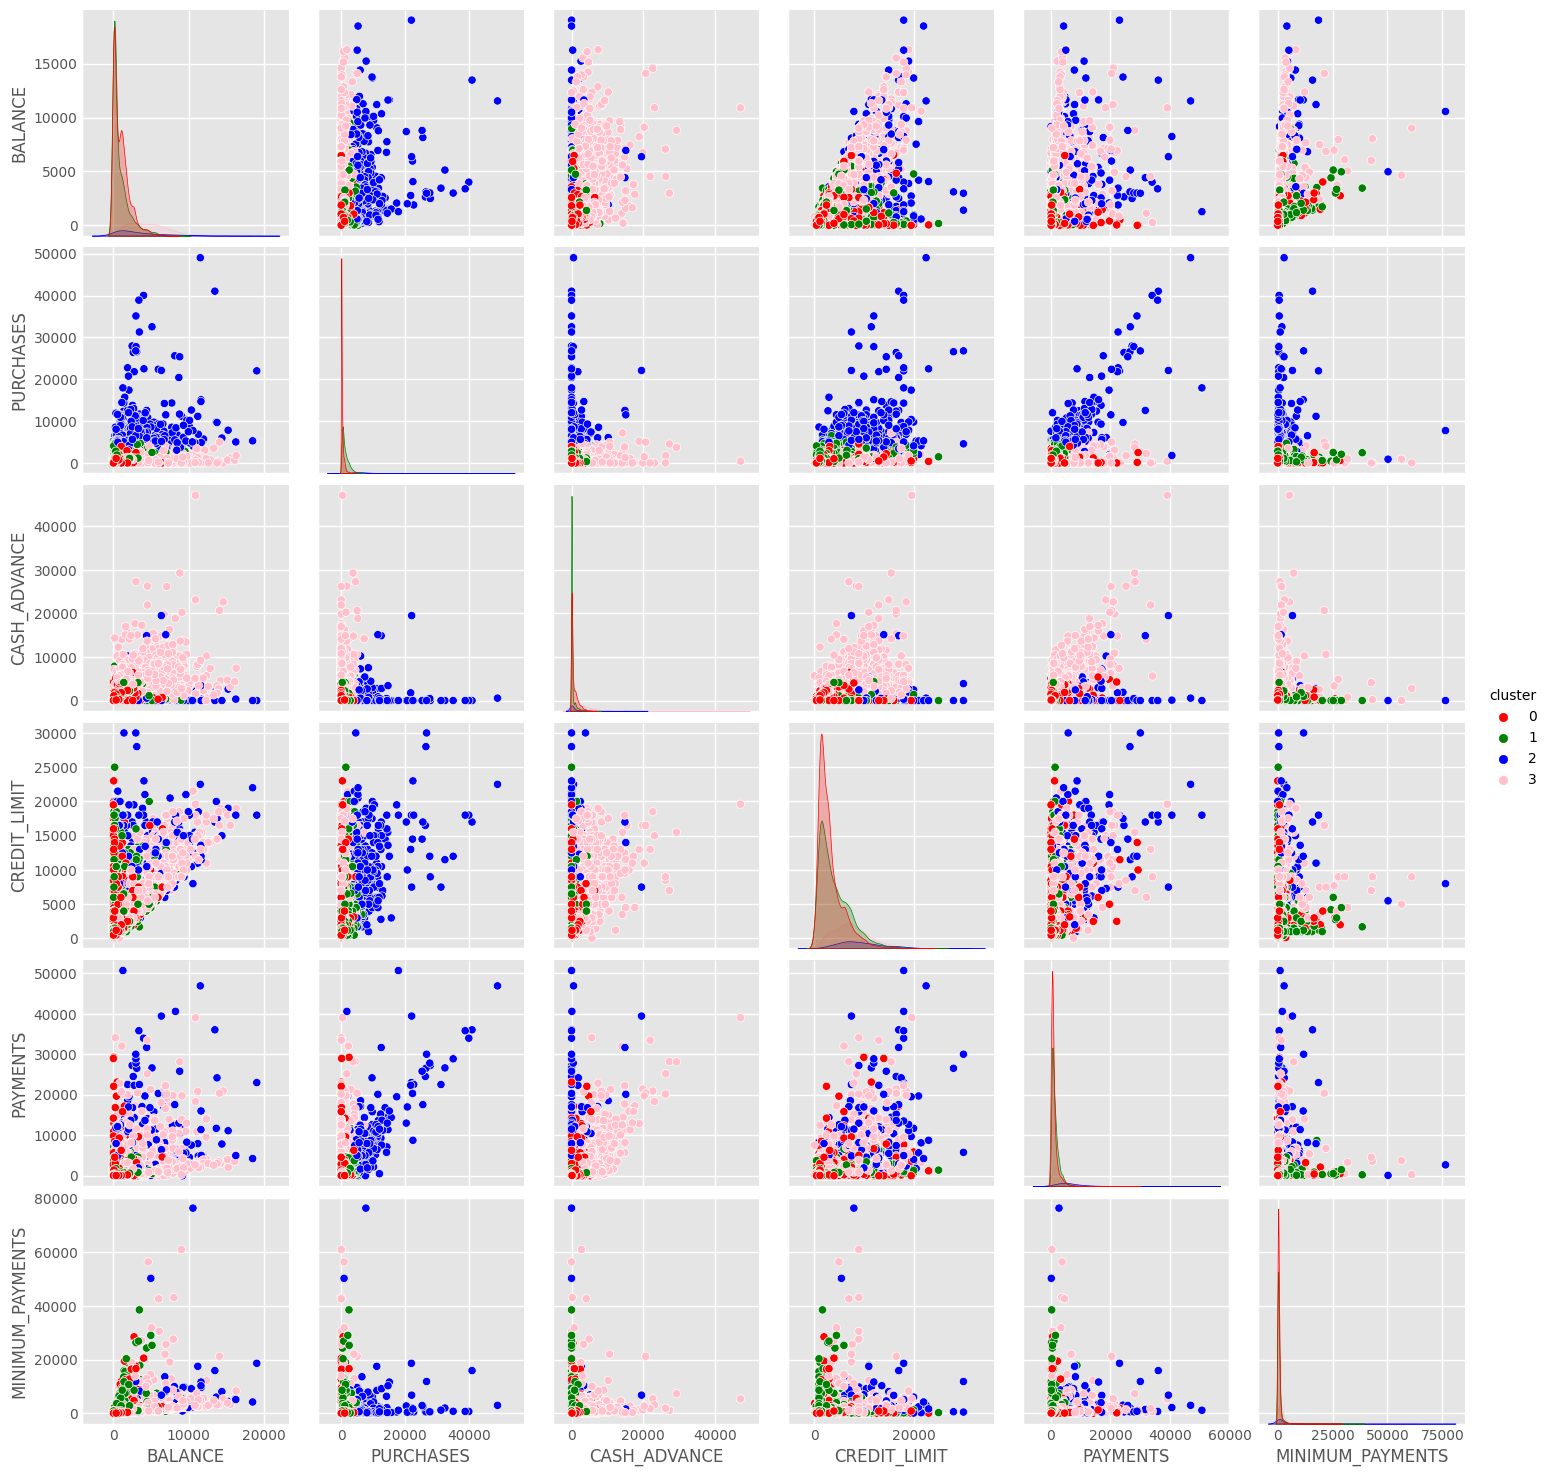

In [56]:
cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","cluster"]
sns.pairplot(df_cluster[cols], hue="cluster",palette = ['red','green','blue','pink'])

In [57]:
df_summary

cluster,Metrics,0,1,2,3
Column Name,,,,,
BALANCE,mean,1011.839396,894.768927,3551.153761,4602.462714
BALANCE_FREQUENCY,mean,0.789924,0.934715,0.986879,0.968415
PURCHASES,mean,270.144981,1236.263333,7681.620098,501.896219
ONEOFF_PURCHASES,mean,209.932625,593.995933,5095.878826,320.373681
INSTALLMENTS_PURCHASES,mean,60.479311,642.541696,2587.208264,181.607404
CASH_ADVANCE,mean,596.300906,209.816318,653.638891,4520.724309
PURCHASES_FREQUENCY,mean,0.170250,0.885255,0.946418,0.287731
ONEOFF_PURCHASES_FREQUENCY,mean,0.086301,0.297109,0.739031,0.138934
PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.080662,0.711930,0.788060,0.185516


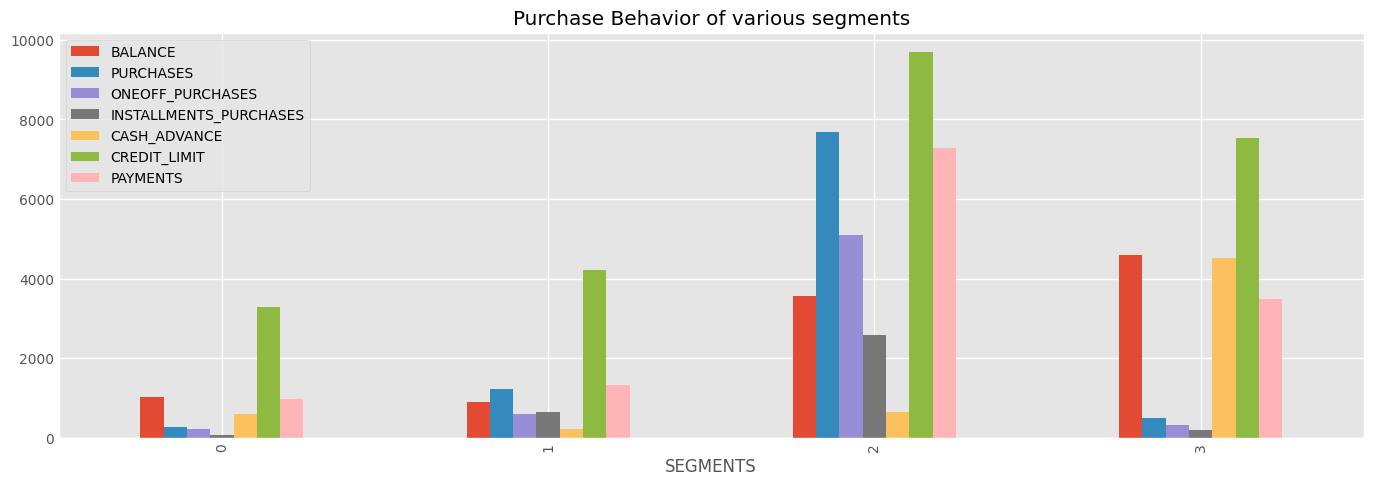

In [58]:
(df_cluster[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'cluster']].groupby('cluster').mean().plot.bar(figsize=(15, 5)))
plt.title('Purchase Behavior of various segments')
plt.xlabel('SEGMENTS');

### **Insights:**

- The majority of customers belong to Cluster 0 and Cluster 1, while the outliers belong to Cluster 2 and Cluster 3, which have fewer customers.

- **CLUSTER 0**: Customers in this group tend to make fewer purchase transactions compared to other clusters. They may focus on specific or occasional purchases rather than frequent shopping. This group might consist of customers with lower balances or those who are new to credit card usage with limited credit history.

- **CLUSTER 1**: These customers demonstrate conservative financial behavior, prioritizing responsible spending and minimal interest charges. 
    - They maintain the lowest balances 895 (unit) and cash advances 210 (unit) among the clusters, indicating cautious money management. 
    - Their percentage of full payment is moderate at 27%, suggesting they pay off a significant portion of their balances each billing cycle.
    
- **CLUSTER 2**: This customer segment represents individuals with high credit limits and a strong propensity for full payment, indicating responsible credit usage and financial stability. Here are the key characteristics of this segment:
    - High Credit Limit: Customers have the highest credit limits, averaging 10,000 (unit). This suggests that they are trusted and financially stable customers, deemed capable of managing larger lines of credit.
    - Highest Percentage of Full Payment: These customers exhibit the highest percentage of full payment among all segments. They consistently pay off their credit card balances in full, indicating responsible financial behavior and a strong ability to manage their debts effectively.
    - Balanced Spending: While they have access to high credit limits, their balances and one-off purchases are relatively moderate. This suggests that they utilize their credit cards judiciously, avoiding excessive spending beyond their means.
    - Minimum Payments: Their minimum payments are also high, indicating that they are proactive in managing their credit card debts and avoiding late payments or penalties.
    - Overall, this segment represents a valuable group of financially responsible and creditworthy customers. They are less likely to default on their payments and are more likely to generate consistent revenue for credit card issuers. Efforts to reward and incentivize their responsible financial behavior, such as offering increased credit limits and tailored rewards programs, can further strengthen their loyalty and satisfaction.

- **CLUSTER 3**: This customer segment represents individuals who primarily use their credit cards as a loan, often referred to as "revolvers." Here are the key characteristics of this segment:
    - High Balances: These customers maintain the highest balances on their credit cards, with an average balance of 5000 (unit). This suggests that they regularly carry significant debt from month to month.
    - Cash Advances: They frequently utilize cash advances, with an average cash advance amount of approximately 5000 (unit). This indicates a reliance on their credit cards to obtain cash, potentially to cover immediate financial needs or to supplement their cash flow.
    - Low Purchase Frequency: Despite their high balances and cash advances, these customers exhibit low purchase frequency. They may rely more on their credit cards for cash advances rather than for making purchases.
    - High Cash Advance Frequency and Transactions: These customers have a high cash advance frequency (0.5) and a substantial number of cash advance transactions (14). This further emphasizes their tendency to use their credit cards as a source of short-term financing.
    - Low Percentage of Full Payment: The percentage of full payment for this segment is low, averaging at 3%. This indicates that they typically make only minimal payments on their credit card balances, allowing interest charges to accumulate.
    
By implementing targeted strategies for each customer cluster, credit card issuers can effectively address the unique needs and behaviors of their diverse customer base, ultimately improving customer satisfaction, loyalty, and overall business performance.

### **Recommendations:**

- **Cluster 0**: Send email notifications about special offers and events to create interest and satisfaction among this customer group. Focus on providing information about financial education programs and basic financial products, such as credit-building products, to help them understand personal finance management and responsible credit card usage better.
- **Cluster 1**: Send email notifications about special offers and events to reinforce the conservative financial behavior of this customer group. Create exclusive rewards or promotions for this group to recognize and encourage their behavior of full and timely payments.
- **Cluster 2**: Given their high credit limits and excellent payment behavior, these customers are ideal candidates for credit limit increases. They have demonstrated the ability to responsibly manage larger lines of credit and may benefit from increased purchasing power. Send personalized email notifications about special offers and events, such as credit limit increases or premium rewards programs. Focus on introducing new installment payment offers to enhance spending behavior and optimize sales volume for this group. Moreover, targeting them for efforts to increase spending habits could further enhance their engagement and loyalty. 
- **Cluster 3**: This segment represents a lucrative sector for credit card issuers due to the high interest revenue generated from the revolving balances. However, it also highlights the financial vulnerability of these customers, as they may be caught in a cycle of debt accumulation and high-interest payments. Send email notifications about resources and support services, such as financial education programs and debt management tools, to help improve the financial health of this customer group. Prioritize sending notifications about installment payment offers if available, to provide them with additional opportunities to manage and reduce their outstanding debts.

# 5. Discussion & Conclusion

By applying KMeans clustering, our organization aims to classify customers into distinct groups based on their behavior and characteristics. Outliers, in this context, may not necessarily be negative outliers; in reality, customer datasets often contain missing values and outliers, as customers have diverse preferences and purposes for using our services.

After clustering customers using KMeans, it is observed that outliers are primarily found in two clusters: Cluster 2 and Cluster 3. These outliers could be considered as distinct groups, thus they can be utilized for customer exploration or service enhancement.

- Enhance and expand existing membership tiers to increase attractiveness and value for customers; Provide exclusive offers, gifts, or special discounts for premium members to retain them and encourage membership retention
- Enhance and expand existing membership tiers to increase attractiveness and value for customers; Provide exclusive offers, gifts, or special discounts for premium members to retain them and encourage membership retention
- Create a seamless, convenient, and enjoyable shopping experience to encourage customers to continue transacting; Enhance online features, provide clear information and services, and offer prompt and professional customer support.
- Offer reward point conversion services to customers, such as converting points into real value. For example, allow customers to apply reward points for direct discounts on transactions or use them to purchase products or services.
- Review customer feedback to identify key issues and adjust business strategies, production processes, and customer service; Prioritize product and service quality to ensure customer satisfaction and meet customer needs.